In [288]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.axes._axes as axes
sns.set()

In [289]:
# import the necessary keras packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score


from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from imutils import paths

In [290]:
cwd = os.getcwd()
data_file = f"{cwd}//df_depressionlevel_median_imputed.csv"
depression_data = pd.read_csv(data_file)
depression_data.head()

,Patient-ID,depression_score,date,week_num,location_daily_locationvariance,location_daily_loglocationvariance,location_daily_totaldistance,location_daily_averagespeed,location_daily_varspeed,location_daily_circadianmovement,...,call_incoming_daily_count,call_incoming_daily_distinctcontacts,call_incoming_daily_meanduration,call_incoming_daily_sumduration,call_incoming_daily_minduration,call_incoming_daily_maxduration,call_incoming_daily_modeduration,call_incoming_daily_timefirstcall,call_incoming_daily_timelastcall,depression_level
0,19HL,9,5/19/2020,1,0.041307,-3.009923,109518.156200,26.916578,4451.886200,0.523614,...,3.285714,3.285714,1403.285714,3441.571429,825.714286,2641.142857,2229.428571,394.142857,871.285714,2
1,19HL,12,5/26/2020,2,0.000125,-4.781617,13617.571040,4.725519,248.163360,-0.563407,...,3.571429,3.571429,894.351190,4736.000000,9.857143,3103.857143,11.428571,634.142857,907.142857,3
2,19HL,11,6/2/2020,3,0.000075,-3.295846,8220.443966,75.056043,1018.057662,-0.340036,...,4.571429,4.571429,1946.675170,7748.285714,95.714286,5190.000000,2585.285714,629.285714,1216.571429,3
3,19HL,7,6/9/2020,4,0.000081,-3.292259,9832.078288,11.578641,576.307436,-0.236498,...,3.857143,3.857143,603.566667,3692.857143,10.714286,2197.714286,70.000000,300.714286,697.571429,2
4,19HL,15,7/7/2020,8,3.115409,-3.382519,254789.933100,67.341228,10160.117000,0.214006,...,4.285714,4.285714,1949.355556,8088.428571,768.571429,3635.714286,2073.428571,507.857143,1041.857143,4


In [291]:
x_features = depression_data.drop(axis=1,
                                  labels=['Patient-ID', 
                                          'depression_score',
                                          'date', 'week_num',
                                          'depression_level'])

y_features = depression_data['depression_score']

In [292]:
x_features.head()

,location_daily_locationvariance,location_daily_loglocationvariance,location_daily_totaldistance,location_daily_averagespeed,location_daily_varspeed,location_daily_circadianmovement,location_daily_numberofsignificantplaces,location_daily_numberlocationtransitions,location_daily_radiusgyration,location_daily_timeattop1,...,ar_daily_sumvehicle,call_incoming_daily_count,call_incoming_daily_distinctcontacts,call_incoming_daily_meanduration,call_incoming_daily_sumduration,call_incoming_daily_minduration,call_incoming_daily_maxduration,call_incoming_daily_modeduration,call_incoming_daily_timefirstcall,call_incoming_daily_timelastcall
0,0.041307,-3.009923,109518.156200,26.916578,4451.886200,0.523614,8.857143,56.285714,0.012764,540.428571,...,32.408274,3.285714,3.285714,1403.285714,3441.571429,825.714286,2641.142857,2229.428571,394.142857,871.285714
1,0.000125,-4.781617,13617.571040,4.725519,248.163360,-0.563407,4.142857,11.142857,0.021963,1043.285714,...,17.774505,3.571429,3.571429,894.351190,4736.000000,9.857143,3103.857143,11.428571,634.142857,907.142857
2,0.000075,-3.295846,8220.443966,75.056043,1018.057662,-0.340036,1.857143,2.285714,0.009044,1342.142857,...,9.317190,4.571429,4.571429,1946.675170,7748.285714,95.714286,5190.000000,2585.285714,629.285714,1216.571429
3,0.000081,-3.292259,9832.078288,11.578641,576.307436,-0.236498,3.000000,5.714286,0.010362,663.857143,...,10.360171,3.857143,3.857143,603.566667,3692.857143,10.714286,2197.714286,70.000000,300.714286,697.571429
4,3.115409,-3.382519,254789.933100,67.341228,10160.117000,0.214006,3.857143,10.142857,0.047525,713.714286,...,160.608607,4.285714,4.285714,1949.355556,8088.428571,768.571429,3635.714286,2073.428571,507.857143,1041.857143


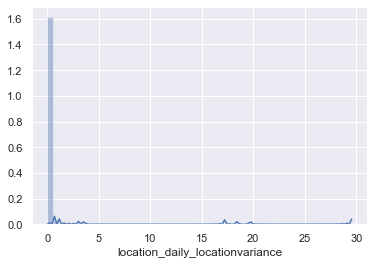

In [293]:
sns.distplot(x_features['location_daily_locationvariance'])

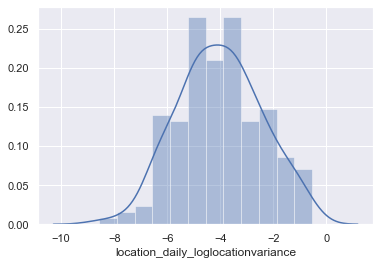

In [294]:
sns.distplot(x_features['location_daily_loglocationvariance'])

In [295]:
x_features['location_daily_locationvariance'].skew()

7.23290149986929

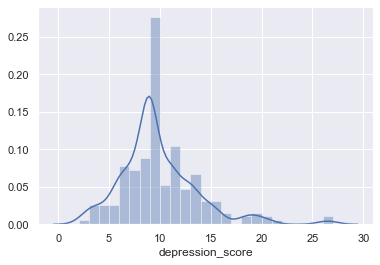

In [296]:
sns.distplot(y_features)

In [297]:
x_features_logscaled = x_features.copy()

for col in x_features.columns:
    skew = x_features[col].skew()
    if np.abs(skew) > 1:
        # then scale the feature
        x_features_logscaled[col] = x_features[col].apply(lambda x: np.log(x))

x_features_logscaled.head()        

,location_daily_locationvariance,location_daily_loglocationvariance,location_daily_totaldistance,location_daily_averagespeed,location_daily_varspeed,location_daily_circadianmovement,location_daily_numberofsignificantplaces,location_daily_numberlocationtransitions,location_daily_radiusgyration,location_daily_timeattop1,...,ar_daily_sumvehicle,call_incoming_daily_count,call_incoming_daily_distinctcontacts,call_incoming_daily_meanduration,call_incoming_daily_sumduration,call_incoming_daily_minduration,call_incoming_daily_maxduration,call_incoming_daily_modeduration,call_incoming_daily_timefirstcall,call_incoming_daily_timelastcall
0,-3.186726,-3.009923,11.603846,3.292742,8.401083,0.523614,2.181224,4.030441,-4.361094,540.428571,...,3.478414,1.189584,1.189584,7.246572,8.143683,6.716249,7.878967,7.709501,394.142857,871.285714
1,-8.990827,-4.781617,9.519116,1.552977,5.514087,-0.563407,1.421386,2.410799,-3.818417,1043.285714,...,2.877765,1.272966,1.272966,6.796099,8.462948,2.288196,8.040401,2.436116,634.142857,907.142857
2,-9.502030,-3.295846,9.014379,4.318235,6.925652,-0.340036,0.619039,0.826679,-4.705670,1342.142857,...,2.231861,1.519826,1.519826,7.573878,8.955227,4.561368,8.554489,7.857591,629.285714,1216.571429
3,-9.423534,-3.292259,9.193406,2.449162,6.356641,-0.236498,1.098612,1.742969,-4.569582,663.857143,...,2.337969,1.349927,1.349927,6.402857,8.214156,2.371578,7.695173,4.248495,300.714286,697.571429
4,1.136361,-3.382519,12.448195,4.209773,9.226225,0.214006,1.349927,2.316770,-3.046489,713.714286,...,5.078970,1.455287,1.455287,7.575254,8.998190,6.644534,8.198561,7.636959,507.857143,1041.857143


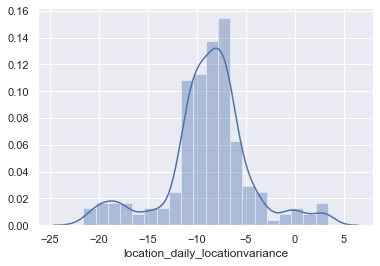

In [298]:
sns.distplot(x_features_logscaled['location_daily_locationvariance'])

In [299]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_features_transformed = scaler.fit_transform(x_features_logscaled)

In [300]:
x_features_transformed.shape

(192, 61)

In [301]:
# make the FC model

def create_model(first_layer_units=1024):
    
    # create the constant part of the model
    model = Sequential()
    model.add(Dense(units=first_layer_units, input_shape=(x_features_transformed.shape[1], )))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    # populate the neuron list
    units_list = []
    while first_layer_units % 2 == 0:
        first_layer_units /= 2
        units_list.append(first_layer_units)
    
    # create the variable part of the model
    for i, units in enumerate(units_list):
        model.add(Dense(units=units))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        #model.add(Dropout(0.25))
    
    # return the created model
    model.add(Dense(units=1))
    #model.add(Activation('sigmoid'))
    return model

In [302]:
y_features = np.array(y_features)
trainx, testx, trainy, testy = train_test_split(x_features_transformed,
                                                y_features,
                                                test_size=0.2,
                                                random_state=42)

In [303]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [308]:
model = create_model(256)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 256)               15872     
_________________________________________________________________
activation_117 (Activation)  (None, 256)               0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 256)               1024      
_________________________________________________________________
dense_122 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_118 (Activation)  (None, 128)               0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 128)               512       
_________________________________________________________________
dense_123 (Dense)            (None, 64)              

In [309]:
opt = Adam(learning_rate=0.0001)
epochs = 5000
model.compile(loss='mse',
              optimizer=opt,
              metrics=[coeff_determination])
H = model.fit(trainx, trainy, 
              validation_data=(testx, testy),
              epochs=epochs,
             batch_size=trainx.shape[0])

Train on 153 samples, validate on 39 samples
Epoch 1/5000
153/153 [==============================] - 4s 24ms/sample - loss: 109.8910 - coeff_determination: -6.2194 - val_loss: 119.5850 - val_coeff_determination: -7.9636
Epoch 2/5000
153/153 [==============================] - 0s 208us/sample - loss: 109.6248 - coeff_determination: -6.2019 - val_loss: 119.5800 - val_coeff_determination: -7.9632
Epoch 3/5000
153/153 [==============================] - 0s 215us/sample - loss: 109.5855 - coeff_determination: -6.1993 - val_loss: 119.5716 - val_coeff_determination: -7.9626
Epoch 4/5000
153/153 [==============================] - 0s 196us/sample - loss: 109.5697 - coeff_determination: -6.1983 - val_loss: 119.5674 - val_coeff_determination: -7.9623
Epoch 5/5000
153/153 [==============================] - 0s 202us/sample - loss: 109.5544 - coeff_determination: -6.1973 - val_loss: 119.5614 - val_coeff_determination: -7.9618
Epoch 6/5000
153/153 [==============================] - 0s 215us/sample - lo

Epoch 48/5000
153/153 [==============================] - 0s 163us/sample - loss: 108.8671 - coeff_determination: -6.1521 - val_loss: 117.9755 - val_coeff_determination: -7.8429
Epoch 49/5000
153/153 [==============================] - 0s 176us/sample - loss: 108.8568 - coeff_determination: -6.1514 - val_loss: 117.9445 - val_coeff_determination: -7.8406
Epoch 50/5000
153/153 [==============================] - 0s 196us/sample - loss: 108.8559 - coeff_determination: -6.1514 - val_loss: 117.9146 - val_coeff_determination: -7.8384
Epoch 51/5000
153/153 [==============================] - 0s 176us/sample - loss: 108.8548 - coeff_determination: -6.1513 - val_loss: 117.8854 - val_coeff_determination: -7.8362
Epoch 52/5000
153/153 [==============================] - 0s 143us/sample - loss: 108.8521 - coeff_determination: -6.1511 - val_loss: 117.8564 - val_coeff_determination: -7.8340
Epoch 53/5000
153/153 [==============================] - 0s 137us/sample - loss: 108.8478 - coeff_determination: -6

Epoch 95/5000
153/153 [==============================] - 0s 196us/sample - loss: 108.6608 - coeff_determination: -6.1386 - val_loss: 116.7449 - val_coeff_determination: -7.7507
Epoch 96/5000
153/153 [==============================] - 0s 238us/sample - loss: 108.6570 - coeff_determination: -6.1383 - val_loss: 116.7244 - val_coeff_determination: -7.7492
Epoch 97/5000
153/153 [==============================] - 0s 196us/sample - loss: 108.6552 - coeff_determination: -6.1382 - val_loss: 116.7040 - val_coeff_determination: -7.7476
Epoch 98/5000
153/153 [==============================] - 0s 189us/sample - loss: 108.6500 - coeff_determination: -6.1379 - val_loss: 116.6841 - val_coeff_determination: -7.7461
Epoch 99/5000
153/153 [==============================] - 0s 209us/sample - loss: 108.6460 - coeff_determination: -6.1376 - val_loss: 116.6626 - val_coeff_determination: -7.7445
Epoch 100/5000
153/153 [==============================] - 0s 222us/sample - loss: 108.6476 - coeff_determination: -

Epoch 142/5000
153/153 [==============================] - 0s 248us/sample - loss: 108.4503 - coeff_determination: -6.1247 - val_loss: 115.8796 - val_coeff_determination: -7.6858
Epoch 143/5000
153/153 [==============================] - 0s 228us/sample - loss: 108.4486 - coeff_determination: -6.1246 - val_loss: 115.8681 - val_coeff_determination: -7.6850
Epoch 144/5000
153/153 [==============================] - 0s 306us/sample - loss: 108.4454 - coeff_determination: -6.1244 - val_loss: 115.8552 - val_coeff_determination: -7.6840
Epoch 145/5000
153/153 [==============================] - 0s 495us/sample - loss: 108.4423 - coeff_determination: -6.1242 - val_loss: 115.8418 - val_coeff_determination: -7.6830
Epoch 146/5000
153/153 [==============================] - 0s 352us/sample - loss: 108.4369 - coeff_determination: -6.1239 - val_loss: 115.8290 - val_coeff_determination: -7.6820
Epoch 147/5000
153/153 [==============================] - 0s 342us/sample - loss: 108.4321 - coeff_determinati

Epoch 189/5000
153/153 [==============================] - 0s 196us/sample - loss: 108.2962 - coeff_determination: -6.1146 - val_loss: 115.7199 - val_coeff_determination: -7.6739
Epoch 190/5000
153/153 [==============================] - 0s 176us/sample - loss: 108.2904 - coeff_determination: -6.1142 - val_loss: 115.7293 - val_coeff_determination: -7.6746
Epoch 191/5000
153/153 [==============================] - 0s 189us/sample - loss: 108.2915 - coeff_determination: -6.1143 - val_loss: 115.7428 - val_coeff_determination: -7.6756
Epoch 192/5000
153/153 [==============================] - 0s 209us/sample - loss: 108.2691 - coeff_determination: -6.1128 - val_loss: 115.7549 - val_coeff_determination: -7.6765
Epoch 193/5000
153/153 [==============================] - 0s 209us/sample - loss: 108.2438 - coeff_determination: -6.1112 - val_loss: 115.7690 - val_coeff_determination: -7.6775
Epoch 194/5000
153/153 [==============================] - 0s 202us/sample - loss: 108.2272 - coeff_determinati

153/153 [==============================] - 0s 176us/sample - loss: 108.0888 - coeff_determination: -6.1010 - val_loss: 116.4152 - val_coeff_determination: -7.7260
Epoch 236/5000
153/153 [==============================] - 0s 202us/sample - loss: 108.0841 - coeff_determination: -6.1007 - val_loss: 116.4336 - val_coeff_determination: -7.7274
Epoch 237/5000
153/153 [==============================] - 0s 183us/sample - loss: 108.0808 - coeff_determination: -6.1005 - val_loss: 116.4537 - val_coeff_determination: -7.7289
Epoch 238/5000
153/153 [==============================] - 0s 160us/sample - loss: 108.0767 - coeff_determination: -6.1002 - val_loss: 116.4747 - val_coeff_determination: -7.7304
Epoch 239/5000
153/153 [==============================] - 0s 169us/sample - loss: 108.0753 - coeff_determination: -6.1001 - val_loss: 116.4921 - val_coeff_determination: -7.7317
Epoch 240/5000
153/153 [==============================] - 0s 163us/sample - loss: 108.0711 - coeff_determination: -6.0998 - v

Epoch 282/5000
153/153 [==============================] - 0s 169us/sample - loss: 107.9033 - coeff_determination: -6.0888 - val_loss: 116.9240 - val_coeff_determination: -7.7641
Epoch 283/5000
153/153 [==============================] - 0s 176us/sample - loss: 107.9150 - coeff_determination: -6.0896 - val_loss: 116.9367 - val_coeff_determination: -7.7651
Epoch 284/5000
153/153 [==============================] - 0s 176us/sample - loss: 107.9207 - coeff_determination: -6.0899 - val_loss: 116.9431 - val_coeff_determination: -7.7655
Epoch 285/5000
153/153 [==============================] - 0s 163us/sample - loss: 107.9001 - coeff_determination: -6.0886 - val_loss: 116.9411 - val_coeff_determination: -7.7654
Epoch 286/5000
153/153 [==============================] - 0s 182us/sample - loss: 107.8929 - coeff_determination: -6.0881 - val_loss: 116.9386 - val_coeff_determination: -7.7652
Epoch 287/5000
153/153 [==============================] - 0s 150us/sample - loss: 107.8965 - coeff_determinati

153/153 [==============================] - 0s 212us/sample - loss: 107.7528 - coeff_determination: -6.0789 - val_loss: 117.3343 - val_coeff_determination: -7.7949
Epoch 329/5000
153/153 [==============================] - 0s 222us/sample - loss: 107.7481 - coeff_determination: -6.0786 - val_loss: 117.3490 - val_coeff_determination: -7.7960
Epoch 330/5000
153/153 [==============================] - 0s 222us/sample - loss: 107.7453 - coeff_determination: -6.0784 - val_loss: 117.3569 - val_coeff_determination: -7.7966
Epoch 331/5000
153/153 [==============================] - 0s 202us/sample - loss: 107.7439 - coeff_determination: -6.0783 - val_loss: 117.3555 - val_coeff_determination: -7.7965
Epoch 332/5000
153/153 [==============================] - 0s 196us/sample - loss: 107.7402 - coeff_determination: -6.0781 - val_loss: 117.3636 - val_coeff_determination: -7.7971
Epoch 333/5000
153/153 [==============================] - 0s 189us/sample - loss: 107.7376 - coeff_determination: -6.0779 - v

Epoch 375/5000
153/153 [==============================] - 0s 180us/sample - loss: 107.6022 - coeff_determination: -6.0690 - val_loss: 118.0917 - val_coeff_determination: -7.8516
Epoch 376/5000
153/153 [==============================] - 0s 169us/sample - loss: 107.5975 - coeff_determination: -6.0687 - val_loss: 118.1113 - val_coeff_determination: -7.8531
Epoch 377/5000
153/153 [==============================] - 0s 169us/sample - loss: 107.5924 - coeff_determination: -6.0684 - val_loss: 118.1370 - val_coeff_determination: -7.8550
Epoch 378/5000
153/153 [==============================] - 0s 176us/sample - loss: 107.5898 - coeff_determination: -6.0682 - val_loss: 118.1574 - val_coeff_determination: -7.8566
Epoch 379/5000
153/153 [==============================] - 0s 140us/sample - loss: 107.5915 - coeff_determination: -6.0683 - val_loss: 118.1438 - val_coeff_determination: -7.8555
Epoch 380/5000
153/153 [==============================] - 0s 176us/sample - loss: 107.5859 - coeff_determinati

153/153 [==============================] - 0s 169us/sample - loss: 107.4312 - coeff_determination: -6.0578 - val_loss: 118.2142 - val_coeff_determination: -7.8608
Epoch 422/5000
153/153 [==============================] - 0s 169us/sample - loss: 107.4279 - coeff_determination: -6.0576 - val_loss: 118.1903 - val_coeff_determination: -7.8590
Epoch 423/5000
153/153 [==============================] - 0s 163us/sample - loss: 107.4219 - coeff_determination: -6.0572 - val_loss: 118.1658 - val_coeff_determination: -7.8572
Epoch 424/5000
153/153 [==============================] - 0s 170us/sample - loss: 107.4153 - coeff_determination: -6.0567 - val_loss: 118.1449 - val_coeff_determination: -7.8556
Epoch 425/5000
153/153 [==============================] - 0s 150us/sample - loss: 107.4108 - coeff_determination: -6.0564 - val_loss: 118.1264 - val_coeff_determination: -7.8542
Epoch 426/5000
153/153 [==============================] - 0s 170us/sample - loss: 107.4055 - coeff_determination: -6.0561 - v

Epoch 468/5000
153/153 [==============================] - 0s 169us/sample - loss: 107.0583 - coeff_determination: -6.0333 - val_loss: 119.2004 - val_coeff_determination: -7.9347
Epoch 469/5000
153/153 [==============================] - 0s 196us/sample - loss: 107.0551 - coeff_determination: -6.0331 - val_loss: 119.2239 - val_coeff_determination: -7.9365
Epoch 470/5000
153/153 [==============================] - 0s 150us/sample - loss: 107.0506 - coeff_determination: -6.0328 - val_loss: 119.2529 - val_coeff_determination: -7.9387
Epoch 471/5000
153/153 [==============================] - 0s 163us/sample - loss: 107.0476 - coeff_determination: -6.0326 - val_loss: 119.2505 - val_coeff_determination: -7.9385
Epoch 472/5000
153/153 [==============================] - 0s 137us/sample - loss: 107.0436 - coeff_determination: -6.0323 - val_loss: 119.2527 - val_coeff_determination: -7.9387
Epoch 473/5000
153/153 [==============================] - 0s 163us/sample - loss: 107.0405 - coeff_determinati

153/153 [==============================] - 0s 215us/sample - loss: 106.8977 - coeff_determination: -6.0227 - val_loss: 119.2980 - val_coeff_determination: -7.9421
Epoch 515/5000
153/153 [==============================] - 0s 154us/sample - loss: 106.8934 - coeff_determination: -6.0225 - val_loss: 119.3144 - val_coeff_determination: -7.9433
Epoch 516/5000
153/153 [==============================] - 0s 150us/sample - loss: 106.8906 - coeff_determination: -6.0223 - val_loss: 119.3099 - val_coeff_determination: -7.9429
Epoch 517/5000
153/153 [==============================] - 0s 176us/sample - loss: 106.8855 - coeff_determination: -6.0219 - val_loss: 119.3097 - val_coeff_determination: -7.9429
Epoch 518/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.8819 - coeff_determination: -6.0217 - val_loss: 119.3141 - val_coeff_determination: -7.9433
Epoch 519/5000
153/153 [==============================] - 0s 189us/sample - loss: 106.8803 - coeff_determination: -6.0216 - v

Epoch 561/5000
153/153 [==============================] - 0s 160us/sample - loss: 106.7373 - coeff_determination: -6.0122 - val_loss: 119.3233 - val_coeff_determination: -7.9440
Epoch 562/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.7339 - coeff_determination: -6.0120 - val_loss: 119.3258 - val_coeff_determination: -7.9441
Epoch 563/5000
153/153 [==============================] - 0s 169us/sample - loss: 106.7299 - coeff_determination: -6.0117 - val_loss: 119.3301 - val_coeff_determination: -7.9445
Epoch 564/5000
153/153 [==============================] - 0s 163us/sample - loss: 106.7255 - coeff_determination: -6.0114 - val_loss: 119.3364 - val_coeff_determination: -7.9449
Epoch 565/5000
153/153 [==============================] - 0s 166us/sample - loss: 106.7207 - coeff_determination: -6.0111 - val_loss: 119.3443 - val_coeff_determination: -7.9455
Epoch 566/5000
153/153 [==============================] - 0s 143us/sample - loss: 106.7155 - coeff_determinati

153/153 [==============================] - 0s 163us/sample - loss: 106.5765 - coeff_determination: -6.0016 - val_loss: 119.2628 - val_coeff_determination: -7.9394
Epoch 608/5000
153/153 [==============================] - 0s 169us/sample - loss: 106.5713 - coeff_determination: -6.0013 - val_loss: 119.2586 - val_coeff_determination: -7.9391
Epoch 609/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.5667 - coeff_determination: -6.0010 - val_loss: 119.2514 - val_coeff_determination: -7.9386
Epoch 610/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.5648 - coeff_determination: -6.0009 - val_loss: 119.2428 - val_coeff_determination: -7.9379
Epoch 611/5000
153/153 [==============================] - 0s 163us/sample - loss: 106.5622 - coeff_determination: -6.0007 - val_loss: 119.2356 - val_coeff_determination: -7.9374
Epoch 612/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.5590 - coeff_determination: -6.0005 - v

Epoch 654/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.4108 - coeff_determination: -5.9907 - val_loss: 119.2744 - val_coeff_determination: -7.9403
Epoch 655/5000
153/153 [==============================] - 0s 169us/sample - loss: 106.4064 - coeff_determination: -5.9905 - val_loss: 119.2822 - val_coeff_determination: -7.9409
Epoch 656/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.4015 - coeff_determination: -5.9901 - val_loss: 119.2911 - val_coeff_determination: -7.9415
Epoch 657/5000
153/153 [==============================] - 0s 156us/sample - loss: 106.4006 - coeff_determination: -5.9901 - val_loss: 119.2931 - val_coeff_determination: -7.9417
Epoch 658/5000
153/153 [==============================] - 0s 150us/sample - loss: 106.3953 - coeff_determination: -5.9897 - val_loss: 119.2892 - val_coeff_determination: -7.9414
Epoch 659/5000
153/153 [==============================] - 0s 163us/sample - loss: 106.3919 - coeff_determinati

153/153 [==============================] - 0s 169us/sample - loss: 106.2469 - coeff_determination: -5.9800 - val_loss: 119.2717 - val_coeff_determination: -7.9401
Epoch 701/5000
153/153 [==============================] - 0s 176us/sample - loss: 106.2442 - coeff_determination: -5.9798 - val_loss: 119.2619 - val_coeff_determination: -7.9394
Epoch 702/5000
153/153 [==============================] - 0s 150us/sample - loss: 106.2415 - coeff_determination: -5.9796 - val_loss: 119.2567 - val_coeff_determination: -7.9390
Epoch 703/5000
153/153 [==============================] - 0s 182us/sample - loss: 106.2384 - coeff_determination: -5.9794 - val_loss: 119.2551 - val_coeff_determination: -7.9388
Epoch 704/5000
153/153 [==============================] - 0s 183us/sample - loss: 106.2347 - coeff_determination: -5.9792 - val_loss: 119.2555 - val_coeff_determination: -7.9389
Epoch 705/5000
153/153 [==============================] - 0s 163us/sample - loss: 106.2312 - coeff_determination: -5.9789 - v

Epoch 747/5000
153/153 [==============================] - 0s 176us/sample - loss: 106.0804 - coeff_determination: -5.9690 - val_loss: 119.2182 - val_coeff_determination: -7.9361
Epoch 748/5000
153/153 [==============================] - 0s 169us/sample - loss: 106.0772 - coeff_determination: -5.9688 - val_loss: 119.2141 - val_coeff_determination: -7.9358
Epoch 749/5000
153/153 [==============================] - 0s 183us/sample - loss: 106.0734 - coeff_determination: -5.9686 - val_loss: 119.2127 - val_coeff_determination: -7.9357
Epoch 750/5000
153/153 [==============================] - 0s 169us/sample - loss: 106.0693 - coeff_determination: -5.9683 - val_loss: 119.2173 - val_coeff_determination: -7.9360
Epoch 751/5000
153/153 [==============================] - 0s 163us/sample - loss: 106.0650 - coeff_determination: -5.9680 - val_loss: 119.2264 - val_coeff_determination: -7.9367
Epoch 752/5000
153/153 [==============================] - 0s 143us/sample - loss: 106.0628 - coeff_determinati

153/153 [==============================] - 0s 150us/sample - loss: 105.9209 - coeff_determination: -5.9586 - val_loss: 119.2464 - val_coeff_determination: -7.9382
Epoch 794/5000
153/153 [==============================] - 0s 173us/sample - loss: 105.9175 - coeff_determination: -5.9583 - val_loss: 119.2465 - val_coeff_determination: -7.9382
Epoch 795/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.9136 - coeff_determination: -5.9581 - val_loss: 119.2475 - val_coeff_determination: -7.9383
Epoch 796/5000
153/153 [==============================] - 0s 183us/sample - loss: 105.9091 - coeff_determination: -5.9578 - val_loss: 119.2511 - val_coeff_determination: -7.9385
Epoch 797/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.9050 - coeff_determination: -5.9575 - val_loss: 119.2663 - val_coeff_determination: -7.9397
Epoch 798/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.9000 - coeff_determination: -5.9572 - v

Epoch 840/5000
153/153 [==============================] - 0s 157us/sample - loss: 105.7530 - coeff_determination: -5.9475 - val_loss: 119.2750 - val_coeff_determination: -7.9403
Epoch 841/5000
153/153 [==============================] - 0s 150us/sample - loss: 105.7465 - coeff_determination: -5.9471 - val_loss: 119.2552 - val_coeff_determination: -7.9389
Epoch 842/5000
153/153 [==============================] - 0s 176us/sample - loss: 105.7421 - coeff_determination: -5.9468 - val_loss: 119.2348 - val_coeff_determination: -7.9373
Epoch 843/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.7402 - coeff_determination: -5.9467 - val_loss: 119.2177 - val_coeff_determination: -7.9360
Epoch 844/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.7379 - coeff_determination: -5.9465 - val_loss: 119.2029 - val_coeff_determination: -7.9349
Epoch 845/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.7349 - coeff_determinati

153/153 [==============================] - 0s 150us/sample - loss: 105.5741 - coeff_determination: -5.9358 - val_loss: 119.2197 - val_coeff_determination: -7.9362
Epoch 887/5000
153/153 [==============================] - 0s 150us/sample - loss: 105.5715 - coeff_determination: -5.9356 - val_loss: 119.2213 - val_coeff_determination: -7.9363
Epoch 888/5000
153/153 [==============================] - 0s 156us/sample - loss: 105.5669 - coeff_determination: -5.9353 - val_loss: 119.2281 - val_coeff_determination: -7.9368
Epoch 889/5000
153/153 [==============================] - 0s 189us/sample - loss: 105.5631 - coeff_determination: -5.9351 - val_loss: 119.2282 - val_coeff_determination: -7.9368
Epoch 890/5000
153/153 [==============================] - 0s 189us/sample - loss: 105.5620 - coeff_determination: -5.9350 - val_loss: 119.2283 - val_coeff_determination: -7.9368
Epoch 891/5000
153/153 [==============================] - 0s 176us/sample - loss: 105.5567 - coeff_determination: -5.9346 - v

Epoch 933/5000
153/153 [==============================] - 0s 150us/sample - loss: 105.4042 - coeff_determination: -5.9246 - val_loss: 119.2038 - val_coeff_determination: -7.9350
Epoch 934/5000
153/153 [==============================] - 0s 186us/sample - loss: 105.4016 - coeff_determination: -5.9244 - val_loss: 119.1926 - val_coeff_determination: -7.9342
Epoch 935/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.3987 - coeff_determination: -5.9243 - val_loss: 119.1907 - val_coeff_determination: -7.9340
Epoch 936/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.3956 - coeff_determination: -5.9240 - val_loss: 119.1765 - val_coeff_determination: -7.9330
Epoch 937/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.3924 - coeff_determination: -5.9238 - val_loss: 119.1864 - val_coeff_determination: -7.9337
Epoch 938/5000
153/153 [==============================] - 0s 143us/sample - loss: 105.3882 - coeff_determinati

153/153 [==============================] - 0s 183us/sample - loss: 105.2360 - coeff_determination: -5.9136 - val_loss: 119.0295 - val_coeff_determination: -7.9219
Epoch 980/5000
153/153 [==============================] - 0s 143us/sample - loss: 105.2331 - coeff_determination: -5.9134 - val_loss: 119.0189 - val_coeff_determination: -7.9211
Epoch 981/5000
153/153 [==============================] - 0s 176us/sample - loss: 105.2285 - coeff_determination: -5.9131 - val_loss: 119.0088 - val_coeff_determination: -7.9204
Epoch 982/5000
153/153 [==============================] - 0s 156us/sample - loss: 105.2257 - coeff_determination: -5.9129 - val_loss: 119.0082 - val_coeff_determination: -7.9203
Epoch 983/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.2224 - coeff_determination: -5.9127 - val_loss: 119.0215 - val_coeff_determination: -7.9213
Epoch 984/5000
153/153 [==============================] - 0s 163us/sample - loss: 105.2197 - coeff_determination: -5.9125 - v

Epoch 1025/5000
153/153 [==============================] - 0s 176us/sample - loss: 105.0692 - coeff_determination: -5.9026 - val_loss: 119.1342 - val_coeff_determination: -7.9298
Epoch 1026/5000
153/153 [==============================] - 0s 156us/sample - loss: 105.0650 - coeff_determination: -5.9023 - val_loss: 119.1323 - val_coeff_determination: -7.9296
Epoch 1027/5000
153/153 [==============================] - 0s 143us/sample - loss: 105.0609 - coeff_determination: -5.9021 - val_loss: 119.1438 - val_coeff_determination: -7.9305
Epoch 1028/5000
153/153 [==============================] - 0s 156us/sample - loss: 105.0572 - coeff_determination: -5.9018 - val_loss: 119.1616 - val_coeff_determination: -7.9318
Epoch 1029/5000
153/153 [==============================] - 0s 169us/sample - loss: 105.0527 - coeff_determination: -5.9015 - val_loss: 119.1641 - val_coeff_determination: -7.9320
Epoch 1030/5000
153/153 [==============================] - 0s 183us/sample - loss: 105.0490 - coeff_deter

Epoch 1071/5000
153/153 [==============================] - 0s 202us/sample - loss: 104.8977 - coeff_determination: -5.8913 - val_loss: 118.9612 - val_coeff_determination: -7.9168
Epoch 1072/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.8944 - coeff_determination: -5.8911 - val_loss: 118.9673 - val_coeff_determination: -7.9173
Epoch 1073/5000
153/153 [==============================] - 0s 143us/sample - loss: 104.8912 - coeff_determination: -5.8909 - val_loss: 118.9532 - val_coeff_determination: -7.9162
Epoch 1074/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.8869 - coeff_determination: -5.8906 - val_loss: 118.9478 - val_coeff_determination: -7.9158
Epoch 1075/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.8833 - coeff_determination: -5.8904 - val_loss: 118.9316 - val_coeff_determination: -7.9146
Epoch 1076/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.8803 - coeff_deter

Epoch 1117/5000
153/153 [==============================] - 0s 143us/sample - loss: 104.7276 - coeff_determination: -5.8802 - val_loss: 118.8448 - val_coeff_determination: -7.9081
Epoch 1118/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.7238 - coeff_determination: -5.8799 - val_loss: 118.8441 - val_coeff_determination: -7.9080
Epoch 1119/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.7203 - coeff_determination: -5.8797 - val_loss: 118.8471 - val_coeff_determination: -7.9083
Epoch 1120/5000
153/153 [==============================] - 0s 150us/sample - loss: 104.7166 - coeff_determination: -5.8794 - val_loss: 118.8405 - val_coeff_determination: -7.9078
Epoch 1121/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.7129 - coeff_determination: -5.8792 - val_loss: 118.8404 - val_coeff_determination: -7.9078
Epoch 1122/5000
153/153 [==============================] - 0s 150us/sample - loss: 104.7092 - coeff_deter

Epoch 1163/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.5567 - coeff_determination: -5.8689 - val_loss: 118.7413 - val_coeff_determination: -7.9003
Epoch 1164/5000
153/153 [==============================] - 0s 160us/sample - loss: 104.5525 - coeff_determination: -5.8687 - val_loss: 118.7366 - val_coeff_determination: -7.9000
Epoch 1165/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.5488 - coeff_determination: -5.8684 - val_loss: 118.7285 - val_coeff_determination: -7.8994
Epoch 1166/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.5447 - coeff_determination: -5.8682 - val_loss: 118.7139 - val_coeff_determination: -7.8983
Epoch 1167/5000
153/153 [==============================] - 0s 209us/sample - loss: 104.5409 - coeff_determination: -5.8679 - val_loss: 118.6979 - val_coeff_determination: -7.8971
Epoch 1168/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.5374 - coeff_deter

Epoch 1209/5000
153/153 [==============================] - 0s 143us/sample - loss: 104.3833 - coeff_determination: -5.8576 - val_loss: 118.5929 - val_coeff_determination: -7.8892
Epoch 1210/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.3799 - coeff_determination: -5.8573 - val_loss: 118.5905 - val_coeff_determination: -7.8890
Epoch 1211/5000
153/153 [==============================] - 0s 137us/sample - loss: 104.3759 - coeff_determination: -5.8571 - val_loss: 118.5993 - val_coeff_determination: -7.8897
Epoch 1212/5000
153/153 [==============================] - 0s 130us/sample - loss: 104.3722 - coeff_determination: -5.8568 - val_loss: 118.5984 - val_coeff_determination: -7.8896
Epoch 1213/5000
153/153 [==============================] - 0s 150us/sample - loss: 104.3686 - coeff_determination: -5.8566 - val_loss: 118.6010 - val_coeff_determination: -7.8898
Epoch 1214/5000
153/153 [==============================] - 0s 143us/sample - loss: 104.3651 - coeff_deter

Epoch 1255/5000
153/153 [==============================] - 0s 158us/sample - loss: 104.2112 - coeff_determination: -5.8462 - val_loss: 118.5331 - val_coeff_determination: -7.8847
Epoch 1256/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.2071 - coeff_determination: -5.8460 - val_loss: 118.5257 - val_coeff_determination: -7.8842
Epoch 1257/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.2034 - coeff_determination: -5.8457 - val_loss: 118.5049 - val_coeff_determination: -7.8826
Epoch 1258/5000
153/153 [==============================] - 0s 176us/sample - loss: 104.1997 - coeff_determination: -5.8455 - val_loss: 118.5026 - val_coeff_determination: -7.8824
Epoch 1259/5000
153/153 [==============================] - 0s 149us/sample - loss: 104.1965 - coeff_determination: -5.8453 - val_loss: 118.4872 - val_coeff_determination: -7.8813
Epoch 1260/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.1929 - coeff_deter

Epoch 1301/5000
153/153 [==============================] - 0s 143us/sample - loss: 104.0357 - coeff_determination: -5.8347 - val_loss: 118.5014 - val_coeff_determination: -7.8824
Epoch 1302/5000
153/153 [==============================] - 0s 163us/sample - loss: 104.0320 - coeff_determination: -5.8345 - val_loss: 118.5016 - val_coeff_determination: -7.8824
Epoch 1303/5000
153/153 [==============================] - 0s 151us/sample - loss: 104.0282 - coeff_determination: -5.8342 - val_loss: 118.5110 - val_coeff_determination: -7.8831
Epoch 1304/5000
153/153 [==============================] - 0s 169us/sample - loss: 104.0246 - coeff_determination: -5.8340 - val_loss: 118.5036 - val_coeff_determination: -7.8825
Epoch 1305/5000
153/153 [==============================] - 0s 158us/sample - loss: 104.0210 - coeff_determination: -5.8337 - val_loss: 118.5115 - val_coeff_determination: -7.8831
Epoch 1306/5000
153/153 [==============================] - 0s 156us/sample - loss: 104.0175 - coeff_deter

Epoch 1347/5000
153/153 [==============================] - 0s 148us/sample - loss: 103.8607 - coeff_determination: -5.8232 - val_loss: 118.3857 - val_coeff_determination: -7.8737
Epoch 1348/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.8566 - coeff_determination: -5.8229 - val_loss: 118.3912 - val_coeff_determination: -7.8741
Epoch 1349/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.8528 - coeff_determination: -5.8227 - val_loss: 118.3877 - val_coeff_determination: -7.8738
Epoch 1350/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.8490 - coeff_determination: -5.8224 - val_loss: 118.3883 - val_coeff_determination: -7.8739
Epoch 1351/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.8452 - coeff_determination: -5.8222 - val_loss: 118.3866 - val_coeff_determination: -7.8737
Epoch 1352/5000
153/153 [==============================] - 0s 183us/sample - loss: 103.8413 - coeff_deter

Epoch 1393/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.6842 - coeff_determination: -5.8116 - val_loss: 118.2917 - val_coeff_determination: -7.8666
Epoch 1394/5000
153/153 [==============================] - 0s 156us/sample - loss: 103.6808 - coeff_determination: -5.8114 - val_loss: 118.2955 - val_coeff_determination: -7.8669
Epoch 1395/5000
153/153 [==============================] - 0s 150us/sample - loss: 103.6765 - coeff_determination: -5.8111 - val_loss: 118.3039 - val_coeff_determination: -7.8675
Epoch 1396/5000
153/153 [==============================] - 0s 174us/sample - loss: 103.6727 - coeff_determination: -5.8109 - val_loss: 118.3005 - val_coeff_determination: -7.8673
Epoch 1397/5000
153/153 [==============================] - 0s 189us/sample - loss: 103.6690 - coeff_determination: -5.8106 - val_loss: 118.3069 - val_coeff_determination: -7.8678
Epoch 1398/5000
153/153 [==============================] - 0s 156us/sample - loss: 103.6653 - coeff_deter

Epoch 1439/5000
153/153 [==============================] - 0s 170us/sample - loss: 103.5072 - coeff_determination: -5.8000 - val_loss: 118.1730 - val_coeff_determination: -7.8577
Epoch 1440/5000
153/153 [==============================] - 0s 156us/sample - loss: 103.5035 - coeff_determination: -5.7997 - val_loss: 118.1825 - val_coeff_determination: -7.8584
Epoch 1441/5000
153/153 [==============================] - 0s 155us/sample - loss: 103.4993 - coeff_determination: -5.7995 - val_loss: 118.1835 - val_coeff_determination: -7.8585
Epoch 1442/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.4955 - coeff_determination: -5.7992 - val_loss: 118.1850 - val_coeff_determination: -7.8586
Epoch 1443/5000
153/153 [==============================] - 0s 191us/sample - loss: 103.4918 - coeff_determination: -5.7990 - val_loss: 118.1921 - val_coeff_determination: -7.8592
Epoch 1444/5000
153/153 [==============================] - 0s 170us/sample - loss: 103.4880 - coeff_deter

Epoch 1485/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.3298 - coeff_determination: -5.7883 - val_loss: 118.1347 - val_coeff_determination: -7.8549
Epoch 1486/5000
153/153 [==============================] - 0s 202us/sample - loss: 103.3262 - coeff_determination: -5.7881 - val_loss: 118.1112 - val_coeff_determination: -7.8531
Epoch 1487/5000
153/153 [==============================] - 0s 156us/sample - loss: 103.3226 - coeff_determination: -5.7879 - val_loss: 118.1257 - val_coeff_determination: -7.8542
Epoch 1488/5000
153/153 [==============================] - 0s 150us/sample - loss: 103.3193 - coeff_determination: -5.7876 - val_loss: 118.0914 - val_coeff_determination: -7.8516
Epoch 1489/5000
153/153 [==============================] - 0s 176us/sample - loss: 103.3161 - coeff_determination: -5.7874 - val_loss: 118.1117 - val_coeff_determination: -7.8531
Epoch 1490/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.3130 - coeff_deter

Epoch 1531/5000
153/153 [==============================] - 0s 176us/sample - loss: 103.1503 - coeff_determination: -5.7765 - val_loss: 117.9714 - val_coeff_determination: -7.8426
Epoch 1532/5000
153/153 [==============================] - 0s 163us/sample - loss: 103.1460 - coeff_determination: -5.7763 - val_loss: 117.9719 - val_coeff_determination: -7.8427
Epoch 1533/5000
153/153 [==============================] - 0s 189us/sample - loss: 103.1422 - coeff_determination: -5.7760 - val_loss: 117.9742 - val_coeff_determination: -7.8428
Epoch 1534/5000
153/153 [==============================] - 0s 176us/sample - loss: 103.1384 - coeff_determination: -5.7758 - val_loss: 117.9733 - val_coeff_determination: -7.8428
Epoch 1535/5000
153/153 [==============================] - 0s 169us/sample - loss: 103.1346 - coeff_determination: -5.7755 - val_loss: 117.9718 - val_coeff_determination: -7.8427
Epoch 1536/5000
153/153 [==============================] - 0s 202us/sample - loss: 103.1307 - coeff_deter

Epoch 1577/5000
153/153 [==============================] - 0s 162us/sample - loss: 102.9703 - coeff_determination: -5.7647 - val_loss: 117.8805 - val_coeff_determination: -7.8358
Epoch 1578/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.9663 - coeff_determination: -5.7645 - val_loss: 117.8813 - val_coeff_determination: -7.8359
Epoch 1579/5000
153/153 [==============================] - 0s 156us/sample - loss: 102.9623 - coeff_determination: -5.7642 - val_loss: 117.8659 - val_coeff_determination: -7.8347
Epoch 1580/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.9584 - coeff_determination: -5.7639 - val_loss: 117.8635 - val_coeff_determination: -7.8345
Epoch 1581/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.9545 - coeff_determination: -5.7637 - val_loss: 117.8532 - val_coeff_determination: -7.8338
Epoch 1582/5000
153/153 [==============================] - 0s 169us/sample - loss: 102.9506 - coeff_deter

Epoch 1623/5000
153/153 [==============================] - 0s 163us/sample - loss: 102.7894 - coeff_determination: -5.7528 - val_loss: 117.8082 - val_coeff_determination: -7.8304
Epoch 1624/5000
153/153 [==============================] - 0s 176us/sample - loss: 102.7853 - coeff_determination: -5.7526 - val_loss: 117.7985 - val_coeff_determination: -7.8297
Epoch 1625/5000
153/153 [==============================] - 0s 170us/sample - loss: 102.7813 - coeff_determination: -5.7523 - val_loss: 117.7924 - val_coeff_determination: -7.8292
Epoch 1626/5000
153/153 [==============================] - 0s 169us/sample - loss: 102.7774 - coeff_determination: -5.7520 - val_loss: 117.7828 - val_coeff_determination: -7.8285
Epoch 1627/5000
153/153 [==============================] - 0s 155us/sample - loss: 102.7735 - coeff_determination: -5.7518 - val_loss: 117.7897 - val_coeff_determination: -7.8290
Epoch 1628/5000
153/153 [==============================] - 0s 183us/sample - loss: 102.7695 - coeff_deter

Epoch 1669/5000
153/153 [==============================] - 0s 189us/sample - loss: 102.6079 - coeff_determination: -5.7409 - val_loss: 117.6237 - val_coeff_determination: -7.8166
Epoch 1670/5000
153/153 [==============================] - 0s 202us/sample - loss: 102.6041 - coeff_determination: -5.7407 - val_loss: 117.6044 - val_coeff_determination: -7.8151
Epoch 1671/5000
153/153 [==============================] - 0s 183us/sample - loss: 102.6000 - coeff_determination: -5.7404 - val_loss: 117.6073 - val_coeff_determination: -7.8153
Epoch 1672/5000
153/153 [==============================] - 0s 187us/sample - loss: 102.5959 - coeff_determination: -5.7401 - val_loss: 117.6130 - val_coeff_determination: -7.8158
Epoch 1673/5000
153/153 [==============================] - 0s 189us/sample - loss: 102.5916 - coeff_determination: -5.7398 - val_loss: 117.6150 - val_coeff_determination: -7.8159
Epoch 1674/5000
153/153 [==============================] - 0s 179us/sample - loss: 102.5878 - coeff_deter

Epoch 1715/5000
153/153 [==============================] - 0s 176us/sample - loss: 102.4249 - coeff_determination: -5.7289 - val_loss: 117.5375 - val_coeff_determination: -7.8101
Epoch 1716/5000
153/153 [==============================] - 0s 176us/sample - loss: 102.4212 - coeff_determination: -5.7286 - val_loss: 117.5322 - val_coeff_determination: -7.8097
Epoch 1717/5000
153/153 [==============================] - 0s 184us/sample - loss: 102.4174 - coeff_determination: -5.7284 - val_loss: 117.5313 - val_coeff_determination: -7.8096
Epoch 1718/5000
153/153 [==============================] - 0s 176us/sample - loss: 102.4135 - coeff_determination: -5.7281 - val_loss: 117.5258 - val_coeff_determination: -7.8092
Epoch 1719/5000
153/153 [==============================] - 0s 189us/sample - loss: 102.4094 - coeff_determination: -5.7279 - val_loss: 117.5205 - val_coeff_determination: -7.8088
Epoch 1720/5000
153/153 [==============================] - 0s 156us/sample - loss: 102.4052 - coeff_deter

Epoch 1761/5000
153/153 [==============================] - 0s 196us/sample - loss: 102.2420 - coeff_determination: -5.7169 - val_loss: 117.5022 - val_coeff_determination: -7.8075
Epoch 1762/5000
153/153 [==============================] - 0s 178us/sample - loss: 102.2381 - coeff_determination: -5.7166 - val_loss: 117.5109 - val_coeff_determination: -7.8081
Epoch 1763/5000
153/153 [==============================] - 0s 169us/sample - loss: 102.2342 - coeff_determination: -5.7164 - val_loss: 117.4966 - val_coeff_determination: -7.8070
Epoch 1764/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.2301 - coeff_determination: -5.7161 - val_loss: 117.5018 - val_coeff_determination: -7.8074
Epoch 1765/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.2260 - coeff_determination: -5.7158 - val_loss: 117.4809 - val_coeff_determination: -7.8059
Epoch 1766/5000
153/153 [==============================] - 0s 170us/sample - loss: 102.2218 - coeff_deter

Epoch 1807/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.0591 - coeff_determination: -5.7049 - val_loss: 117.2904 - val_coeff_determination: -7.7916
Epoch 1808/5000
153/153 [==============================] - 0s 150us/sample - loss: 102.0545 - coeff_determination: -5.7046 - val_loss: 117.2518 - val_coeff_determination: -7.7887
Epoch 1809/5000
153/153 [==============================] - 0s 137us/sample - loss: 102.0498 - coeff_determination: -5.7042 - val_loss: 117.1927 - val_coeff_determination: -7.7843
Epoch 1810/5000
153/153 [==============================] - 0s 170us/sample - loss: 102.0456 - coeff_determination: -5.7040 - val_loss: 117.1575 - val_coeff_determination: -7.7816
Epoch 1811/5000
153/153 [==============================] - 0s 196us/sample - loss: 102.0415 - coeff_determination: -5.7037 - val_loss: 117.1348 - val_coeff_determination: -7.7799
Epoch 1812/5000
153/153 [==============================] - 0s 202us/sample - loss: 102.0381 - coeff_deter

Epoch 1853/5000
153/153 [==============================] - 0s 130us/sample - loss: 101.8742 - coeff_determination: -5.6927 - val_loss: 116.9247 - val_coeff_determination: -7.7642
Epoch 1854/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.8708 - coeff_determination: -5.6925 - val_loss: 116.9668 - val_coeff_determination: -7.7673
Epoch 1855/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.8652 - coeff_determination: -5.6921 - val_loss: 117.0120 - val_coeff_determination: -7.7707
Epoch 1856/5000
153/153 [==============================] - 0s 143us/sample - loss: 101.8598 - coeff_determination: -5.6918 - val_loss: 117.2118 - val_coeff_determination: -7.7857
Epoch 1857/5000
153/153 [==============================] - 0s 157us/sample - loss: 101.8596 - coeff_determination: -5.6918 - val_loss: 117.2454 - val_coeff_determination: -7.7882
Epoch 1858/5000
153/153 [==============================] - 0s 150us/sample - loss: 101.8448 - coeff_deter

Epoch 1899/5000
153/153 [==============================] - 0s 163us/sample - loss: 101.6755 - coeff_determination: -5.6797 - val_loss: 117.7520 - val_coeff_determination: -7.8262
Epoch 1900/5000
153/153 [==============================] - 0s 157us/sample - loss: 101.6717 - coeff_determination: -5.6794 - val_loss: 117.7562 - val_coeff_determination: -7.8265
Epoch 1901/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.6676 - coeff_determination: -5.6791 - val_loss: 117.7528 - val_coeff_determination: -7.8262
Epoch 1902/5000
153/153 [==============================] - 0s 182us/sample - loss: 101.6636 - coeff_determination: -5.6789 - val_loss: 117.7428 - val_coeff_determination: -7.8255
Epoch 1903/5000
153/153 [==============================] - 0s 163us/sample - loss: 101.6594 - coeff_determination: -5.6786 - val_loss: 117.7330 - val_coeff_determination: -7.8248
Epoch 1904/5000
153/153 [==============================] - 0s 170us/sample - loss: 101.6551 - coeff_deter

Epoch 1945/5000
153/153 [==============================] - 0s 150us/sample - loss: 101.4906 - coeff_determination: -5.6675 - val_loss: 117.6738 - val_coeff_determination: -7.8203
Epoch 1946/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.4883 - coeff_determination: -5.6674 - val_loss: 117.6992 - val_coeff_determination: -7.8222
Epoch 1947/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.4848 - coeff_determination: -5.6671 - val_loss: 117.6985 - val_coeff_determination: -7.8222
Epoch 1948/5000
153/153 [==============================] - 0s 163us/sample - loss: 101.4800 - coeff_determination: -5.6668 - val_loss: 117.6877 - val_coeff_determination: -7.8214
Epoch 1949/5000
153/153 [==============================] - 0s 163us/sample - loss: 101.4737 - coeff_determination: -5.6664 - val_loss: 117.6775 - val_coeff_determination: -7.8206
Epoch 1950/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.4683 - coeff_deter

Epoch 1991/5000
153/153 [==============================] - 0s 169us/sample - loss: 101.3003 - coeff_determination: -5.6550 - val_loss: 117.7332 - val_coeff_determination: -7.8248
Epoch 1992/5000
153/153 [==============================] - 0s 153us/sample - loss: 101.2962 - coeff_determination: -5.6547 - val_loss: 117.7478 - val_coeff_determination: -7.8259
Epoch 1993/5000
153/153 [==============================] - 0s 176us/sample - loss: 101.2921 - coeff_determination: -5.6545 - val_loss: 117.7575 - val_coeff_determination: -7.8266
Epoch 1994/5000
153/153 [==============================] - 0s 150us/sample - loss: 101.2882 - coeff_determination: -5.6542 - val_loss: 117.7607 - val_coeff_determination: -7.8268
Epoch 1995/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.2843 - coeff_determination: -5.6540 - val_loss: 117.7572 - val_coeff_determination: -7.8266
Epoch 1996/5000
153/153 [==============================] - 0s 170us/sample - loss: 101.2802 - coeff_deter

Epoch 2037/5000
153/153 [==============================] - 0s 183us/sample - loss: 101.1118 - coeff_determination: -5.6426 - val_loss: 117.6229 - val_coeff_determination: -7.8165
Epoch 2038/5000
153/153 [==============================] - 0s 150us/sample - loss: 101.1076 - coeff_determination: -5.6423 - val_loss: 117.6136 - val_coeff_determination: -7.8158
Epoch 2039/5000
153/153 [==============================] - 0s 215us/sample - loss: 101.1034 - coeff_determination: -5.6421 - val_loss: 117.6024 - val_coeff_determination: -7.8150
Epoch 2040/5000
153/153 [==============================] - 0s 156us/sample - loss: 101.0992 - coeff_determination: -5.6418 - val_loss: 117.5904 - val_coeff_determination: -7.8141
Epoch 2041/5000
153/153 [==============================] - 0s 163us/sample - loss: 101.0951 - coeff_determination: -5.6415 - val_loss: 117.5782 - val_coeff_determination: -7.8131
Epoch 2042/5000
153/153 [==============================] - 0s 183us/sample - loss: 101.0910 - coeff_deter

Epoch 2083/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.9224 - coeff_determination: -5.6302 - val_loss: 117.5046 - val_coeff_determination: -7.8076
Epoch 2084/5000
153/153 [==============================] - 0s 156us/sample - loss: 100.9182 - coeff_determination: -5.6299 - val_loss: 117.4927 - val_coeff_determination: -7.8067
Epoch 2085/5000
153/153 [==============================] - 0s 147us/sample - loss: 100.9138 - coeff_determination: -5.6296 - val_loss: 117.4751 - val_coeff_determination: -7.8054
Epoch 2086/5000
153/153 [==============================] - 0s 137us/sample - loss: 100.9097 - coeff_determination: -5.6293 - val_loss: 117.4581 - val_coeff_determination: -7.8041
Epoch 2087/5000
153/153 [==============================] - 0s 150us/sample - loss: 100.9056 - coeff_determination: -5.6291 - val_loss: 117.4437 - val_coeff_determination: -7.8031
Epoch 2088/5000
153/153 [==============================] - 0s 156us/sample - loss: 100.9014 - coeff_deter

Epoch 2129/5000
153/153 [==============================] - 0s 169us/sample - loss: 100.7322 - coeff_determination: -5.6177 - val_loss: 117.4246 - val_coeff_determination: -7.8016
Epoch 2130/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.7280 - coeff_determination: -5.6174 - val_loss: 117.4167 - val_coeff_determination: -7.8010
Epoch 2131/5000
153/153 [==============================] - 0s 164us/sample - loss: 100.7237 - coeff_determination: -5.6171 - val_loss: 117.4021 - val_coeff_determination: -7.8000
Epoch 2132/5000
153/153 [==============================] - 0s 176us/sample - loss: 100.7194 - coeff_determination: -5.6168 - val_loss: 117.3896 - val_coeff_determination: -7.7990
Epoch 2133/5000
153/153 [==============================] - 0s 183us/sample - loss: 100.7153 - coeff_determination: -5.6166 - val_loss: 117.3782 - val_coeff_determination: -7.7982
Epoch 2134/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.7111 - coeff_deter

Epoch 2175/5000
153/153 [==============================] - 0s 202us/sample - loss: 100.5409 - coeff_determination: -5.6051 - val_loss: 116.7170 - val_coeff_determination: -7.7486
Epoch 2176/5000
153/153 [==============================] - 0s 170us/sample - loss: 100.5370 - coeff_determination: -5.6049 - val_loss: 116.7269 - val_coeff_determination: -7.7493
Epoch 2177/5000
153/153 [==============================] - 0s 156us/sample - loss: 100.5326 - coeff_determination: -5.6046 - val_loss: 116.7389 - val_coeff_determination: -7.7502
Epoch 2178/5000
153/153 [==============================] - 0s 150us/sample - loss: 100.5285 - coeff_determination: -5.6043 - val_loss: 116.7558 - val_coeff_determination: -7.7515
Epoch 2179/5000
153/153 [==============================] - 0s 150us/sample - loss: 100.5243 - coeff_determination: -5.6040 - val_loss: 116.7636 - val_coeff_determination: -7.7521
Epoch 2180/5000
153/153 [==============================] - 0s 157us/sample - loss: 100.5202 - coeff_deter

Epoch 2221/5000
153/153 [==============================] - 0s 176us/sample - loss: 100.3495 - coeff_determination: -5.5925 - val_loss: 116.6912 - val_coeff_determination: -7.7467
Epoch 2222/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.3454 - coeff_determination: -5.5923 - val_loss: 116.6866 - val_coeff_determination: -7.7463
Epoch 2223/5000
153/153 [==============================] - 0s 156us/sample - loss: 100.3412 - coeff_determination: -5.5920 - val_loss: 116.6811 - val_coeff_determination: -7.7459
Epoch 2224/5000
153/153 [==============================] - 0s 196us/sample - loss: 100.3369 - coeff_determination: -5.5917 - val_loss: 116.6758 - val_coeff_determination: -7.7455
Epoch 2225/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.3325 - coeff_determination: -5.5914 - val_loss: 116.6725 - val_coeff_determination: -7.7453
Epoch 2226/5000
153/153 [==============================] - 0s 144us/sample - loss: 100.3282 - coeff_deter

Epoch 2267/5000
153/153 [==============================] - 0s 158us/sample - loss: 100.1571 - coeff_determination: -5.5799 - val_loss: 116.6371 - val_coeff_determination: -7.7426
Epoch 2268/5000
153/153 [==============================] - 0s 137us/sample - loss: 100.1528 - coeff_determination: -5.5796 - val_loss: 116.6324 - val_coeff_determination: -7.7423
Epoch 2269/5000
153/153 [==============================] - 0s 150us/sample - loss: 100.1484 - coeff_determination: -5.5793 - val_loss: 116.6270 - val_coeff_determination: -7.7419
Epoch 2270/5000
153/153 [==============================] - 0s 143us/sample - loss: 100.1441 - coeff_determination: -5.5790 - val_loss: 116.6241 - val_coeff_determination: -7.7416
Epoch 2271/5000
153/153 [==============================] - 0s 160us/sample - loss: 100.1399 - coeff_determination: -5.5788 - val_loss: 116.6228 - val_coeff_determination: -7.7415
Epoch 2272/5000
153/153 [==============================] - 0s 163us/sample - loss: 100.1357 - coeff_deter

Epoch 2313/5000
153/153 [==============================] - 0s 170us/sample - loss: 99.9638 - coeff_determination: -5.5672 - val_loss: 116.5376 - val_coeff_determination: -7.7351
Epoch 2314/5000
153/153 [==============================] - 0s 157us/sample - loss: 99.9594 - coeff_determination: -5.5669 - val_loss: 116.5338 - val_coeff_determination: -7.7349
Epoch 2315/5000
153/153 [==============================] - 0s 156us/sample - loss: 99.9550 - coeff_determination: -5.5666 - val_loss: 116.5314 - val_coeff_determination: -7.7347
Epoch 2316/5000
153/153 [==============================] - 0s 196us/sample - loss: 99.9508 - coeff_determination: -5.5664 - val_loss: 116.5293 - val_coeff_determination: -7.7345
Epoch 2317/5000
153/153 [==============================] - 0s 161us/sample - loss: 99.9466 - coeff_determination: -5.5661 - val_loss: 116.5284 - val_coeff_determination: -7.7345
Epoch 2318/5000
153/153 [==============================] - 0s 156us/sample - loss: 99.9424 - coeff_determinati

153/153 [==============================] - 0s 150us/sample - loss: 99.7696 - coeff_determination: -5.5544 - val_loss: 116.4128 - val_coeff_determination: -7.7258
Epoch 2360/5000
153/153 [==============================] - 0s 150us/sample - loss: 99.7657 - coeff_determination: -5.5542 - val_loss: 116.4008 - val_coeff_determination: -7.7249
Epoch 2361/5000
153/153 [==============================] - 0s 143us/sample - loss: 99.7612 - coeff_determination: -5.5539 - val_loss: 116.3918 - val_coeff_determination: -7.7242
Epoch 2362/5000
153/153 [==============================] - 0s 130us/sample - loss: 99.7569 - coeff_determination: -5.5536 - val_loss: 116.3960 - val_coeff_determination: -7.7245
Epoch 2363/5000
153/153 [==============================] - 0s 130us/sample - loss: 99.7527 - coeff_determination: -5.5533 - val_loss: 116.3999 - val_coeff_determination: -7.7248
Epoch 2364/5000
153/153 [==============================] - 0s 176us/sample - loss: 99.7485 - coeff_determination: -5.5531 - va

Epoch 2406/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.5707 - coeff_determination: -5.5414 - val_loss: 116.6230 - val_coeff_determination: -7.7416
Epoch 2407/5000
153/153 [==============================] - 0s 183us/sample - loss: 99.5665 - coeff_determination: -5.5411 - val_loss: 116.6228 - val_coeff_determination: -7.7415
Epoch 2408/5000
153/153 [==============================] - 0s 169us/sample - loss: 99.5623 - coeff_determination: -5.5408 - val_loss: 116.6242 - val_coeff_determination: -7.7416
Epoch 2409/5000
153/153 [==============================] - 0s 189us/sample - loss: 99.5581 - coeff_determination: -5.5405 - val_loss: 116.6333 - val_coeff_determination: -7.7423
Epoch 2410/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.5537 - coeff_determination: -5.5403 - val_loss: 116.6442 - val_coeff_determination: -7.7431
Epoch 2411/5000
153/153 [==============================] - 0s 150us/sample - loss: 99.5495 - coeff_determinati

Epoch 2453/5000
153/153 [==============================] - 0s 147us/sample - loss: 99.3711 - coeff_determination: -5.5283 - val_loss: 116.6347 - val_coeff_determination: -7.7424
Epoch 2454/5000
153/153 [==============================] - 0s 150us/sample - loss: 99.3669 - coeff_determination: -5.5280 - val_loss: 116.6388 - val_coeff_determination: -7.7427
Epoch 2455/5000
153/153 [==============================] - 0s 157us/sample - loss: 99.3626 - coeff_determination: -5.5277 - val_loss: 116.6443 - val_coeff_determination: -7.7432
Epoch 2456/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.3584 - coeff_determination: -5.5274 - val_loss: 116.6447 - val_coeff_determination: -7.7432
Epoch 2457/5000
153/153 [==============================] - 0s 150us/sample - loss: 99.3541 - coeff_determination: -5.5272 - val_loss: 116.6425 - val_coeff_determination: -7.7430
Epoch 2458/5000
153/153 [==============================] - 0s 169us/sample - loss: 99.3499 - coeff_determinati

Epoch 2500/5000
153/153 [==============================] - 0s 157us/sample - loss: 99.1708 - coeff_determination: -5.5151 - val_loss: 116.7536 - val_coeff_determination: -7.7513
Epoch 2501/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.1666 - coeff_determination: -5.5148 - val_loss: 116.7571 - val_coeff_determination: -7.7516
Epoch 2502/5000
153/153 [==============================] - 0s 176us/sample - loss: 99.1623 - coeff_determination: -5.5145 - val_loss: 116.7579 - val_coeff_determination: -7.7517
Epoch 2503/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.1580 - coeff_determination: -5.5143 - val_loss: 116.7607 - val_coeff_determination: -7.7519
Epoch 2504/5000
153/153 [==============================] - 0s 163us/sample - loss: 99.1538 - coeff_determination: -5.5140 - val_loss: 116.7622 - val_coeff_determination: -7.7520
Epoch 2505/5000
153/153 [==============================] - 0s 156us/sample - loss: 99.1495 - coeff_determinati

Epoch 2547/5000
153/153 [==============================] - 0s 163us/sample - loss: 98.9698 - coeff_determination: -5.5019 - val_loss: 116.7768 - val_coeff_determination: -7.7531
Epoch 2548/5000
153/153 [==============================] - 0s 156us/sample - loss: 98.9656 - coeff_determination: -5.5016 - val_loss: 116.7744 - val_coeff_determination: -7.7529
Epoch 2549/5000
153/153 [==============================] - 0s 163us/sample - loss: 98.9613 - coeff_determination: -5.5013 - val_loss: 116.7726 - val_coeff_determination: -7.7528
Epoch 2550/5000
153/153 [==============================] - 0s 150us/sample - loss: 98.9570 - coeff_determination: -5.5011 - val_loss: 116.7708 - val_coeff_determination: -7.7526
Epoch 2551/5000
153/153 [==============================] - 0s 176us/sample - loss: 98.9527 - coeff_determination: -5.5008 - val_loss: 116.7694 - val_coeff_determination: -7.7525
Epoch 2552/5000
153/153 [==============================] - 0s 156us/sample - loss: 98.9484 - coeff_determinati

Epoch 2594/5000
153/153 [==============================] - 0s 173us/sample - loss: 98.7682 - coeff_determination: -5.4887 - val_loss: 116.8003 - val_coeff_determination: -7.7548
Epoch 2595/5000
153/153 [==============================] - 0s 176us/sample - loss: 98.7639 - coeff_determination: -5.4884 - val_loss: 116.7983 - val_coeff_determination: -7.7547
Epoch 2596/5000
153/153 [==============================] - 0s 170us/sample - loss: 98.7596 - coeff_determination: -5.4881 - val_loss: 116.7960 - val_coeff_determination: -7.7545
Epoch 2597/5000
153/153 [==============================] - 0s 156us/sample - loss: 98.7553 - coeff_determination: -5.4878 - val_loss: 116.7946 - val_coeff_determination: -7.7544
Epoch 2598/5000
153/153 [==============================] - 0s 183us/sample - loss: 98.7512 - coeff_determination: -5.4875 - val_loss: 116.7885 - val_coeff_determination: -7.7540
Epoch 2599/5000
153/153 [==============================] - 0s 202us/sample - loss: 98.7468 - coeff_determinati

Epoch 2641/5000
153/153 [==============================] - 0s 183us/sample - loss: 98.5660 - coeff_determination: -5.4754 - val_loss: 116.7823 - val_coeff_determination: -7.7535
Epoch 2642/5000
153/153 [==============================] - 0s 169us/sample - loss: 98.5617 - coeff_determination: -5.4751 - val_loss: 116.7657 - val_coeff_determination: -7.7523
Epoch 2643/5000
153/153 [==============================] - 0s 166us/sample - loss: 98.5575 - coeff_determination: -5.4748 - val_loss: 116.7703 - val_coeff_determination: -7.7526
Epoch 2644/5000
153/153 [==============================] - 0s 163us/sample - loss: 98.5534 - coeff_determination: -5.4745 - val_loss: 116.7669 - val_coeff_determination: -7.7523
Epoch 2645/5000
153/153 [==============================] - 0s 155us/sample - loss: 98.5491 - coeff_determination: -5.4743 - val_loss: 116.7733 - val_coeff_determination: -7.7528
Epoch 2646/5000
153/153 [==============================] - 0s 176us/sample - loss: 98.5447 - coeff_determinati

Epoch 2688/5000
153/153 [==============================] - 0s 189us/sample - loss: 98.3630 - coeff_determination: -5.4620 - val_loss: 116.8158 - val_coeff_determination: -7.7560
Epoch 2689/5000
153/153 [==============================] - 0s 209us/sample - loss: 98.3586 - coeff_determination: -5.4618 - val_loss: 116.8099 - val_coeff_determination: -7.7556
Epoch 2690/5000
153/153 [==============================] - 0s 208us/sample - loss: 98.3543 - coeff_determination: -5.4615 - val_loss: 116.8107 - val_coeff_determination: -7.7556
Epoch 2691/5000
153/153 [==============================] - 0s 150us/sample - loss: 98.3500 - coeff_determination: -5.4612 - val_loss: 116.7997 - val_coeff_determination: -7.7548
Epoch 2692/5000
153/153 [==============================] - 0s 159us/sample - loss: 98.3456 - coeff_determination: -5.4609 - val_loss: 116.8018 - val_coeff_determination: -7.7550
Epoch 2693/5000
153/153 [==============================] - 0s 162us/sample - loss: 98.3414 - coeff_determinati

Epoch 2735/5000
153/153 [==============================] - 0s 163us/sample - loss: 98.1595 - coeff_determination: -5.4487 - val_loss: 116.7283 - val_coeff_determination: -7.7494
Epoch 2736/5000
153/153 [==============================] - 0s 189us/sample - loss: 98.1552 - coeff_determination: -5.4484 - val_loss: 116.7290 - val_coeff_determination: -7.7495
Epoch 2737/5000
153/153 [==============================] - 0s 169us/sample - loss: 98.1508 - coeff_determination: -5.4481 - val_loss: 116.7151 - val_coeff_determination: -7.7485
Epoch 2738/5000
153/153 [==============================] - 0s 150us/sample - loss: 98.1464 - coeff_determination: -5.4478 - val_loss: 116.7127 - val_coeff_determination: -7.7483
Epoch 2739/5000
153/153 [==============================] - 0s 169us/sample - loss: 98.1421 - coeff_determination: -5.4475 - val_loss: 116.6984 - val_coeff_determination: -7.7472
Epoch 2740/5000
153/153 [==============================] - 0s 182us/sample - loss: 98.1378 - coeff_determinati

Epoch 2782/5000
153/153 [==============================] - 0s 169us/sample - loss: 97.9552 - coeff_determination: -5.4352 - val_loss: 116.6213 - val_coeff_determination: -7.7414
Epoch 2783/5000
153/153 [==============================] - 0s 189us/sample - loss: 97.9509 - coeff_determination: -5.4350 - val_loss: 116.6098 - val_coeff_determination: -7.7406
Epoch 2784/5000
153/153 [==============================] - 0s 176us/sample - loss: 97.9466 - coeff_determination: -5.4347 - val_loss: 116.6024 - val_coeff_determination: -7.7400
Epoch 2785/5000
153/153 [==============================] - 0s 182us/sample - loss: 97.9423 - coeff_determination: -5.4344 - val_loss: 116.5957 - val_coeff_determination: -7.7395
Epoch 2786/5000
153/153 [==============================] - 0s 150us/sample - loss: 97.9381 - coeff_determination: -5.4341 - val_loss: 116.5906 - val_coeff_determination: -7.7391
Epoch 2787/5000
153/153 [==============================] - 0s 176us/sample - loss: 97.9337 - coeff_determinati

Epoch 2829/5000
153/153 [==============================] - 0s 150us/sample - loss: 97.7505 - coeff_determination: -5.4218 - val_loss: 116.6758 - val_coeff_determination: -7.7455
Epoch 2830/5000
153/153 [==============================] - 0s 277us/sample - loss: 97.7460 - coeff_determination: -5.4215 - val_loss: 116.6837 - val_coeff_determination: -7.7461
Epoch 2831/5000
153/153 [==============================] - 0s 169us/sample - loss: 97.7417 - coeff_determination: -5.4212 - val_loss: 116.6954 - val_coeff_determination: -7.7470
Epoch 2832/5000
153/153 [==============================] - 0s 156us/sample - loss: 97.7373 - coeff_determination: -5.4209 - val_loss: 116.7020 - val_coeff_determination: -7.7475
Epoch 2833/5000
153/153 [==============================] - 0s 150us/sample - loss: 97.7329 - coeff_determination: -5.4206 - val_loss: 116.7016 - val_coeff_determination: -7.7474
Epoch 2834/5000
153/153 [==============================] - 0s 163us/sample - loss: 97.7285 - coeff_determinati

Epoch 2876/5000
153/153 [==============================] - 0s 150us/sample - loss: 97.5450 - coeff_determination: -5.4083 - val_loss: 117.1321 - val_coeff_determination: -7.7797
Epoch 2877/5000
153/153 [==============================] - 0s 183us/sample - loss: 97.5406 - coeff_determination: -5.4080 - val_loss: 117.1326 - val_coeff_determination: -7.7798
Epoch 2878/5000
153/153 [==============================] - 0s 157us/sample - loss: 97.5364 - coeff_determination: -5.4077 - val_loss: 117.1353 - val_coeff_determination: -7.7800
Epoch 2879/5000
153/153 [==============================] - 0s 157us/sample - loss: 97.5320 - coeff_determination: -5.4074 - val_loss: 117.1379 - val_coeff_determination: -7.7802
Epoch 2880/5000
153/153 [==============================] - 0s 160us/sample - loss: 97.5276 - coeff_determination: -5.4072 - val_loss: 117.1426 - val_coeff_determination: -7.7805
Epoch 2881/5000
153/153 [==============================] - 0s 156us/sample - loss: 97.5233 - coeff_determinati

Epoch 2923/5000
153/153 [==============================] - 0s 157us/sample - loss: 97.3387 - coeff_determination: -5.3947 - val_loss: 117.1539 - val_coeff_determination: -7.7813
Epoch 2924/5000
153/153 [==============================] - 0s 163us/sample - loss: 97.3343 - coeff_determination: -5.3945 - val_loss: 117.1521 - val_coeff_determination: -7.7812
Epoch 2925/5000
153/153 [==============================] - 0s 157us/sample - loss: 97.3299 - coeff_determination: -5.3942 - val_loss: 117.1507 - val_coeff_determination: -7.7811
Epoch 2926/5000
153/153 [==============================] - 0s 163us/sample - loss: 97.3256 - coeff_determination: -5.3939 - val_loss: 117.1487 - val_coeff_determination: -7.7810
Epoch 2927/5000
153/153 [==============================] - 0s 163us/sample - loss: 97.3212 - coeff_determination: -5.3936 - val_loss: 117.1473 - val_coeff_determination: -7.7809
Epoch 2928/5000
153/153 [==============================] - 0s 163us/sample - loss: 97.3168 - coeff_determinati

Epoch 2970/5000
153/153 [==============================] - 0s 169us/sample - loss: 97.1321 - coeff_determination: -5.3812 - val_loss: 117.0860 - val_coeff_determination: -7.7763
Epoch 2971/5000
153/153 [==============================] - 0s 195us/sample - loss: 97.1277 - coeff_determination: -5.3809 - val_loss: 117.0841 - val_coeff_determination: -7.7761
Epoch 2972/5000
153/153 [==============================] - 0s 202us/sample - loss: 97.1233 - coeff_determination: -5.3806 - val_loss: 117.0829 - val_coeff_determination: -7.7760
Epoch 2973/5000
153/153 [==============================] - 0s 228us/sample - loss: 97.1189 - coeff_determination: -5.3803 - val_loss: 117.0809 - val_coeff_determination: -7.7759
Epoch 2974/5000
153/153 [==============================] - 0s 183us/sample - loss: 97.1145 - coeff_determination: -5.3800 - val_loss: 117.0798 - val_coeff_determination: -7.7758
Epoch 2975/5000
153/153 [==============================] - 0s 148us/sample - loss: 97.1101 - coeff_determinati

Epoch 3017/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.9249 - coeff_determination: -5.3676 - val_loss: 116.8845 - val_coeff_determination: -7.7612
Epoch 3018/5000
153/153 [==============================] - 0s 137us/sample - loss: 96.9206 - coeff_determination: -5.3673 - val_loss: 116.8809 - val_coeff_determination: -7.7609
Epoch 3019/5000
153/153 [==============================] - 0s 157us/sample - loss: 96.9162 - coeff_determination: -5.3670 - val_loss: 116.8730 - val_coeff_determination: -7.7603
Epoch 3020/5000
153/153 [==============================] - 0s 169us/sample - loss: 96.9117 - coeff_determination: -5.3667 - val_loss: 116.8781 - val_coeff_determination: -7.7607
Epoch 3021/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.9073 - coeff_determination: -5.3664 - val_loss: 116.8750 - val_coeff_determination: -7.7604
Epoch 3022/5000
153/153 [==============================] - 0s 169us/sample - loss: 96.9029 - coeff_determinati

Epoch 3064/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.7171 - coeff_determination: -5.3539 - val_loss: 116.8229 - val_coeff_determination: -7.7565
Epoch 3065/5000
153/153 [==============================] - 0s 228us/sample - loss: 96.7126 - coeff_determination: -5.3536 - val_loss: 116.8220 - val_coeff_determination: -7.7565
Epoch 3066/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.7082 - coeff_determination: -5.3533 - val_loss: 116.8205 - val_coeff_determination: -7.7564
Epoch 3067/5000
153/153 [==============================] - 0s 163us/sample - loss: 96.7038 - coeff_determination: -5.3530 - val_loss: 116.8196 - val_coeff_determination: -7.7563
Epoch 3068/5000
153/153 [==============================] - 0s 150us/sample - loss: 96.6993 - coeff_determination: -5.3527 - val_loss: 116.8181 - val_coeff_determination: -7.7562
Epoch 3069/5000
153/153 [==============================] - 0s 163us/sample - loss: 96.6949 - coeff_determinati

Epoch 3111/5000
153/153 [==============================] - 0s 176us/sample - loss: 96.5093 - coeff_determination: -5.3403 - val_loss: 116.7477 - val_coeff_determination: -7.7509
Epoch 3112/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.5047 - coeff_determination: -5.3400 - val_loss: 116.7521 - val_coeff_determination: -7.7512
Epoch 3113/5000
153/153 [==============================] - 0s 156us/sample - loss: 96.5001 - coeff_determination: -5.3397 - val_loss: 116.7460 - val_coeff_determination: -7.7508
Epoch 3114/5000
153/153 [==============================] - 0s 170us/sample - loss: 96.4955 - coeff_determination: -5.3394 - val_loss: 116.7443 - val_coeff_determination: -7.7506
Epoch 3115/5000
153/153 [==============================] - 0s 168us/sample - loss: 96.4910 - coeff_determination: -5.3391 - val_loss: 116.7457 - val_coeff_determination: -7.7508
Epoch 3116/5000
153/153 [==============================] - 0s 183us/sample - loss: 96.4866 - coeff_determinati

153/153 [==============================] - 0s 176us/sample - loss: 96.3043 - coeff_determination: -5.3268 - val_loss: 116.6719 - val_coeff_determination: -7.7452
Epoch 3158/5000
153/153 [==============================] - 0s 170us/sample - loss: 96.2998 - coeff_determination: -5.3265 - val_loss: 116.6704 - val_coeff_determination: -7.7451
Epoch 3159/5000
153/153 [==============================] - 0s 169us/sample - loss: 96.2954 - coeff_determination: -5.3262 - val_loss: 116.6689 - val_coeff_determination: -7.7450
Epoch 3160/5000
153/153 [==============================] - 0s 173us/sample - loss: 96.2909 - coeff_determination: -5.3259 - val_loss: 116.6670 - val_coeff_determination: -7.7449
Epoch 3161/5000
153/153 [==============================] - 0s 195us/sample - loss: 96.2865 - coeff_determination: -5.3256 - val_loss: 116.6657 - val_coeff_determination: -7.7448
Epoch 3162/5000
153/153 [==============================] - 0s 183us/sample - loss: 96.2820 - coeff_determination: -5.3253 - va

Epoch 3204/5000
153/153 [==============================] - 0s 176us/sample - loss: 96.0949 - coeff_determination: -5.3130 - val_loss: 116.5940 - val_coeff_determination: -7.7394
Epoch 3205/5000
153/153 [==============================] - 0s 163us/sample - loss: 96.0904 - coeff_determination: -5.3127 - val_loss: 116.5923 - val_coeff_determination: -7.7393
Epoch 3206/5000
153/153 [==============================] - 0s 163us/sample - loss: 96.0860 - coeff_determination: -5.3124 - val_loss: 116.5906 - val_coeff_determination: -7.7391
Epoch 3207/5000
153/153 [==============================] - 0s 151us/sample - loss: 96.0815 - coeff_determination: -5.3122 - val_loss: 116.5889 - val_coeff_determination: -7.7390
Epoch 3208/5000
153/153 [==============================] - 0s 169us/sample - loss: 96.0770 - coeff_determination: -5.3119 - val_loss: 116.5871 - val_coeff_determination: -7.7389
Epoch 3209/5000
153/153 [==============================] - 0s 163us/sample - loss: 96.0726 - coeff_determinati

153/153 [==============================] - 0s 182us/sample - loss: 95.8911 - coeff_determination: -5.2996 - val_loss: 116.5074 - val_coeff_determination: -7.7329
Epoch 3251/5000
153/153 [==============================] - 0s 183us/sample - loss: 95.8868 - coeff_determination: -5.2994 - val_loss: 116.5026 - val_coeff_determination: -7.7325
Epoch 3252/5000
153/153 [==============================] - 0s 163us/sample - loss: 95.8821 - coeff_determination: -5.2991 - val_loss: 116.4996 - val_coeff_determination: -7.7323
Epoch 3253/5000
153/153 [==============================] - 0s 147us/sample - loss: 95.8771 - coeff_determination: -5.2987 - val_loss: 116.4924 - val_coeff_determination: -7.7318
Epoch 3254/5000
153/153 [==============================] - 0s 169us/sample - loss: 95.8721 - coeff_determination: -5.2984 - val_loss: 116.4917 - val_coeff_determination: -7.7317
Epoch 3255/5000
153/153 [==============================] - 0s 163us/sample - loss: 95.8674 - coeff_determination: -5.2981 - va

Epoch 3297/5000
153/153 [==============================] - 0s 143us/sample - loss: 95.6790 - coeff_determination: -5.2857 - val_loss: 116.3963 - val_coeff_determination: -7.7246
Epoch 3298/5000
153/153 [==============================] - 0s 163us/sample - loss: 95.6746 - coeff_determination: -5.2854 - val_loss: 116.3944 - val_coeff_determination: -7.7244
Epoch 3299/5000
153/153 [==============================] - 0s 151us/sample - loss: 95.6701 - coeff_determination: -5.2851 - val_loss: 116.3930 - val_coeff_determination: -7.7243
Epoch 3300/5000
153/153 [==============================] - 0s 183us/sample - loss: 95.6656 - coeff_determination: -5.2848 - val_loss: 116.3907 - val_coeff_determination: -7.7241
Epoch 3301/5000
153/153 [==============================] - 0s 163us/sample - loss: 95.6611 - coeff_determination: -5.2845 - val_loss: 116.3903 - val_coeff_determination: -7.7241
Epoch 3302/5000
153/153 [==============================] - 0s 150us/sample - loss: 95.6566 - coeff_determinati

Epoch 3344/5000
153/153 [==============================] - 0s 182us/sample - loss: 95.4681 - coeff_determination: -5.2719 - val_loss: 116.3233 - val_coeff_determination: -7.7191
Epoch 3345/5000
153/153 [==============================] - 0s 183us/sample - loss: 95.4636 - coeff_determination: -5.2716 - val_loss: 116.3217 - val_coeff_determination: -7.7190
Epoch 3346/5000
153/153 [==============================] - 0s 169us/sample - loss: 95.4591 - coeff_determination: -5.2713 - val_loss: 116.3200 - val_coeff_determination: -7.7188
Epoch 3347/5000
153/153 [==============================] - 0s 183us/sample - loss: 95.4546 - coeff_determination: -5.2710 - val_loss: 116.3184 - val_coeff_determination: -7.7187
Epoch 3348/5000
153/153 [==============================] - 0s 169us/sample - loss: 95.4501 - coeff_determination: -5.2707 - val_loss: 116.3167 - val_coeff_determination: -7.7186
Epoch 3349/5000
153/153 [==============================] - 0s 150us/sample - loss: 95.4456 - coeff_determinati

Epoch 3391/5000
153/153 [==============================] - 0s 135us/sample - loss: 95.2567 - coeff_determination: -5.2580 - val_loss: 116.2247 - val_coeff_determination: -7.7117
Epoch 3392/5000
153/153 [==============================] - 0s 155us/sample - loss: 95.2522 - coeff_determination: -5.2577 - val_loss: 116.2231 - val_coeff_determination: -7.7116
Epoch 3393/5000
153/153 [==============================] - 0s 169us/sample - loss: 95.2477 - coeff_determination: -5.2574 - val_loss: 116.2196 - val_coeff_determination: -7.7113
Epoch 3394/5000
153/153 [==============================] - 0s 150us/sample - loss: 95.2432 - coeff_determination: -5.2571 - val_loss: 116.2184 - val_coeff_determination: -7.7112
Epoch 3395/5000
153/153 [==============================] - 0s 161us/sample - loss: 95.2387 - coeff_determination: -5.2568 - val_loss: 116.2153 - val_coeff_determination: -7.7110
Epoch 3396/5000
153/153 [==============================] - 0s 182us/sample - loss: 95.2342 - coeff_determinati

Epoch 3438/5000
153/153 [==============================] - 0s 137us/sample - loss: 95.0489 - coeff_determination: -5.2443 - val_loss: 116.1214 - val_coeff_determination: -7.7040
Epoch 3439/5000
153/153 [==============================] - 0s 156us/sample - loss: 95.0435 - coeff_determination: -5.2440 - val_loss: 116.0938 - val_coeff_determination: -7.7019
Epoch 3440/5000
153/153 [==============================] - 0s 195us/sample - loss: 95.0374 - coeff_determination: -5.2436 - val_loss: 116.0993 - val_coeff_determination: -7.7023
Epoch 3441/5000
153/153 [==============================] - 0s 163us/sample - loss: 95.0316 - coeff_determination: -5.2432 - val_loss: 116.0960 - val_coeff_determination: -7.7020
Epoch 3442/5000
153/153 [==============================] - 0s 156us/sample - loss: 95.0268 - coeff_determination: -5.2429 - val_loss: 116.0814 - val_coeff_determination: -7.7010
Epoch 3443/5000
153/153 [==============================] - 0s 170us/sample - loss: 95.0229 - coeff_determinati

Epoch 3485/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.8324 - coeff_determination: -5.2301 - val_loss: 115.9832 - val_coeff_determination: -7.6936
Epoch 3486/5000
153/153 [==============================] - 0s 183us/sample - loss: 94.8279 - coeff_determination: -5.2298 - val_loss: 115.9805 - val_coeff_determination: -7.6934
Epoch 3487/5000
153/153 [==============================] - 0s 150us/sample - loss: 94.8233 - coeff_determination: -5.2295 - val_loss: 115.9773 - val_coeff_determination: -7.6932
Epoch 3488/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.8188 - coeff_determination: -5.2292 - val_loss: 115.9773 - val_coeff_determination: -7.6932
Epoch 3489/5000
153/153 [==============================] - 0s 170us/sample - loss: 94.8143 - coeff_determination: -5.2289 - val_loss: 115.9734 - val_coeff_determination: -7.6929
Epoch 3490/5000
153/153 [==============================] - 0s 158us/sample - loss: 94.8098 - coeff_determinati

153/153 [==============================] - 0s 163us/sample - loss: 94.6271 - coeff_determination: -5.2166 - val_loss: 115.3495 - val_coeff_determination: -7.6461
Epoch 3532/5000
153/153 [==============================] - 0s 156us/sample - loss: 94.6241 - coeff_determination: -5.2164 - val_loss: 115.4105 - val_coeff_determination: -7.6507
Epoch 3533/5000
153/153 [==============================] - 0s 169us/sample - loss: 94.6208 - coeff_determination: -5.2162 - val_loss: 115.4202 - val_coeff_determination: -7.6514
Epoch 3534/5000
153/153 [==============================] - 0s 170us/sample - loss: 94.6162 - coeff_determination: -5.2159 - val_loss: 115.4108 - val_coeff_determination: -7.6507
Epoch 3535/5000
153/153 [==============================] - 0s 156us/sample - loss: 94.6106 - coeff_determination: -5.2155 - val_loss: 115.4366 - val_coeff_determination: -7.6526
Epoch 3536/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.6066 - coeff_determination: -5.2153 - va

Epoch 3578/5000
153/153 [==============================] - 0s 196us/sample - loss: 94.4116 - coeff_determination: -5.2025 - val_loss: 114.7302 - val_coeff_determination: -7.5997
Epoch 3579/5000
153/153 [==============================] - 0s 183us/sample - loss: 94.4071 - coeff_determination: -5.2022 - val_loss: 114.6882 - val_coeff_determination: -7.5965
Epoch 3580/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.4026 - coeff_determination: -5.2019 - val_loss: 114.6337 - val_coeff_determination: -7.5924
Epoch 3581/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.3978 - coeff_determination: -5.2015 - val_loss: 114.6424 - val_coeff_determination: -7.5931
Epoch 3582/5000
153/153 [==============================] - 0s 169us/sample - loss: 94.3937 - coeff_determination: -5.2013 - val_loss: 114.7355 - val_coeff_determination: -7.6001
Epoch 3583/5000
153/153 [==============================] - 0s 182us/sample - loss: 94.3887 - coeff_determinati

153/153 [==============================] - 0s 156us/sample - loss: 94.2023 - coeff_determination: -5.1887 - val_loss: 114.9251 - val_coeff_determination: -7.6143
Epoch 3625/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.1975 - coeff_determination: -5.1884 - val_loss: 114.8550 - val_coeff_determination: -7.6090
Epoch 3626/5000
153/153 [==============================] - 0s 150us/sample - loss: 94.1928 - coeff_determination: -5.1881 - val_loss: 114.8031 - val_coeff_determination: -7.6051
Epoch 3627/5000
153/153 [==============================] - 0s 176us/sample - loss: 94.1882 - coeff_determination: -5.1878 - val_loss: 114.7551 - val_coeff_determination: -7.6015
Epoch 3628/5000
153/153 [==============================] - 0s 163us/sample - loss: 94.1837 - coeff_determination: -5.1875 - val_loss: 114.7205 - val_coeff_determination: -7.5989
Epoch 3629/5000
153/153 [==============================] - 0s 150us/sample - loss: 94.1792 - coeff_determination: -5.1872 - va

Epoch 3671/5000
153/153 [==============================] - 0s 183us/sample - loss: 93.9878 - coeff_determination: -5.1746 - val_loss: 115.0582 - val_coeff_determination: -7.6243
Epoch 3672/5000
153/153 [==============================] - 0s 176us/sample - loss: 93.9832 - coeff_determination: -5.1743 - val_loss: 115.0266 - val_coeff_determination: -7.6219
Epoch 3673/5000
153/153 [==============================] - 0s 150us/sample - loss: 93.9786 - coeff_determination: -5.1740 - val_loss: 115.0002 - val_coeff_determination: -7.6199
Epoch 3674/5000
153/153 [==============================] - 0s 156us/sample - loss: 93.9740 - coeff_determination: -5.1737 - val_loss: 114.9822 - val_coeff_determination: -7.6186
Epoch 3675/5000
153/153 [==============================] - 0s 163us/sample - loss: 93.9695 - coeff_determination: -5.1734 - val_loss: 114.9668 - val_coeff_determination: -7.6174
Epoch 3676/5000
153/153 [==============================] - 0s 169us/sample - loss: 93.9649 - coeff_determinati

153/153 [==============================] - 0s 176us/sample - loss: 93.7783 - coeff_determination: -5.1608 - val_loss: 115.6240 - val_coeff_determination: -7.6667
Epoch 3718/5000
153/153 [==============================] - 0s 156us/sample - loss: 93.7737 - coeff_determination: -5.1605 - val_loss: 115.5800 - val_coeff_determination: -7.6634
Epoch 3719/5000
153/153 [==============================] - 0s 179us/sample - loss: 93.7689 - coeff_determination: -5.1602 - val_loss: 115.5086 - val_coeff_determination: -7.6580
Epoch 3720/5000
153/153 [==============================] - 0s 150us/sample - loss: 93.7641 - coeff_determination: -5.1599 - val_loss: 115.4484 - val_coeff_determination: -7.6535
Epoch 3721/5000
153/153 [==============================] - 0s 163us/sample - loss: 93.7595 - coeff_determination: -5.1596 - val_loss: 115.3981 - val_coeff_determination: -7.6497
Epoch 3722/5000
153/153 [==============================] - 0s 183us/sample - loss: 93.7549 - coeff_determination: -5.1593 - va

Epoch 3764/5000
153/153 [==============================] - 0s 156us/sample - loss: 93.5628 - coeff_determination: -5.1467 - val_loss: 115.3527 - val_coeff_determination: -7.6463
Epoch 3765/5000
153/153 [==============================] - 0s 163us/sample - loss: 93.5582 - coeff_determination: -5.1464 - val_loss: 115.3312 - val_coeff_determination: -7.6447
Epoch 3766/5000
153/153 [==============================] - 0s 143us/sample - loss: 93.5539 - coeff_determination: -5.1461 - val_loss: 115.4890 - val_coeff_determination: -7.6565
Epoch 3767/5000
153/153 [==============================] - 0s 163us/sample - loss: 93.5491 - coeff_determination: -5.1458 - val_loss: 115.6017 - val_coeff_determination: -7.6650
Epoch 3768/5000
153/153 [==============================] - 0s 187us/sample - loss: 93.5445 - coeff_determination: -5.1455 - val_loss: 115.7135 - val_coeff_determination: -7.6734
Epoch 3769/5000
153/153 [==============================] - 0s 185us/sample - loss: 93.5400 - coeff_determinati

153/153 [==============================] - 0s 137us/sample - loss: 93.3520 - coeff_determination: -5.1328 - val_loss: 115.3643 - val_coeff_determination: -7.6472
Epoch 3811/5000
153/153 [==============================] - 0s 156us/sample - loss: 93.3474 - coeff_determination: -5.1325 - val_loss: 115.3531 - val_coeff_determination: -7.6464
Epoch 3812/5000
153/153 [==============================] - 0s 143us/sample - loss: 93.3428 - coeff_determination: -5.1322 - val_loss: 115.3342 - val_coeff_determination: -7.6450
Epoch 3813/5000
153/153 [==============================] - 0s 143us/sample - loss: 93.3382 - coeff_determination: -5.1319 - val_loss: 115.3193 - val_coeff_determination: -7.6438
Epoch 3814/5000
153/153 [==============================] - 0s 209us/sample - loss: 93.3336 - coeff_determination: -5.1316 - val_loss: 115.3031 - val_coeff_determination: -7.6426
Epoch 3815/5000
153/153 [==============================] - 0s 157us/sample - loss: 93.3290 - coeff_determination: -5.1313 - va

Epoch 3857/5000
153/153 [==============================] - 0s 140us/sample - loss: 93.1364 - coeff_determination: -5.1187 - val_loss: 115.0570 - val_coeff_determination: -7.6242
Epoch 3858/5000
153/153 [==============================] - 0s 156us/sample - loss: 93.1317 - coeff_determination: -5.1184 - val_loss: 115.0441 - val_coeff_determination: -7.6232
Epoch 3859/5000
153/153 [==============================] - 0s 143us/sample - loss: 93.1270 - coeff_determination: -5.1181 - val_loss: 115.0437 - val_coeff_determination: -7.6232
Epoch 3860/5000
153/153 [==============================] - 0s 137us/sample - loss: 93.1224 - coeff_determination: -5.1178 - val_loss: 115.0370 - val_coeff_determination: -7.6227
Epoch 3861/5000
153/153 [==============================] - 0s 150us/sample - loss: 93.1179 - coeff_determination: -5.1175 - val_loss: 115.0298 - val_coeff_determination: -7.6221
Epoch 3862/5000
153/153 [==============================] - 0s 137us/sample - loss: 93.1133 - coeff_determinati

153/153 [==============================] - 0s 176us/sample - loss: 92.9246 - coeff_determination: -5.1048 - val_loss: 114.9360 - val_coeff_determination: -7.6151
Epoch 3904/5000
153/153 [==============================] - 0s 215us/sample - loss: 92.9200 - coeff_determination: -5.1045 - val_loss: 114.9307 - val_coeff_determination: -7.6147
Epoch 3905/5000
153/153 [==============================] - 0s 248us/sample - loss: 92.9154 - coeff_determination: -5.1042 - val_loss: 114.9292 - val_coeff_determination: -7.6146
Epoch 3906/5000
153/153 [==============================] - 0s 215us/sample - loss: 92.9108 - coeff_determination: -5.1039 - val_loss: 114.9260 - val_coeff_determination: -7.6144
Epoch 3907/5000
153/153 [==============================] - 0s 209us/sample - loss: 92.9062 - coeff_determination: -5.1036 - val_loss: 114.9241 - val_coeff_determination: -7.6142
Epoch 3908/5000
153/153 [==============================] - 0s 169us/sample - loss: 92.9016 - coeff_determination: -5.1032 - va

Epoch 3950/5000
153/153 [==============================] - 0s 150us/sample - loss: 92.7081 - coeff_determination: -5.0905 - val_loss: 114.8435 - val_coeff_determination: -7.6082
Epoch 3951/5000
153/153 [==============================] - 0s 196us/sample - loss: 92.7035 - coeff_determination: -5.0902 - val_loss: 114.8420 - val_coeff_determination: -7.6081
Epoch 3952/5000
153/153 [==============================] - 0s 469us/sample - loss: 92.6989 - coeff_determination: -5.0899 - val_loss: 114.8395 - val_coeff_determination: -7.6079
Epoch 3953/5000
153/153 [==============================] - 0s 489us/sample - loss: 92.6943 - coeff_determination: -5.0896 - val_loss: 114.8383 - val_coeff_determination: -7.6078
Epoch 3954/5000
153/153 [==============================] - 0s 392us/sample - loss: 92.6897 - coeff_determination: -5.0893 - val_loss: 114.8356 - val_coeff_determination: -7.6076
Epoch 3955/5000
153/153 [==============================] - 0s 409us/sample - loss: 92.6850 - coeff_determinati

153/153 [==============================] - 0s 156us/sample - loss: 92.4978 - coeff_determination: -5.0767 - val_loss: 114.7331 - val_coeff_determination: -7.5999
Epoch 3997/5000
153/153 [==============================] - 0s 143us/sample - loss: 92.4924 - coeff_determination: -5.0764 - val_loss: 114.7204 - val_coeff_determination: -7.5989
Epoch 3998/5000
153/153 [==============================] - 0s 163us/sample - loss: 92.4871 - coeff_determination: -5.0760 - val_loss: 114.7066 - val_coeff_determination: -7.5979
Epoch 3999/5000
153/153 [==============================] - 0s 137us/sample - loss: 92.4821 - coeff_determination: -5.0757 - val_loss: 114.7115 - val_coeff_determination: -7.5983
Epoch 4000/5000
153/153 [==============================] - 0s 150us/sample - loss: 92.4775 - coeff_determination: -5.0754 - val_loss: 114.6890 - val_coeff_determination: -7.5966
Epoch 4001/5000
153/153 [==============================] - 0s 163us/sample - loss: 92.4732 - coeff_determination: -5.0751 - va

Epoch 4043/5000
153/153 [==============================] - 0s 145us/sample - loss: 92.2786 - coeff_determination: -5.0623 - val_loss: 114.5524 - val_coeff_determination: -7.5864
Epoch 4044/5000
153/153 [==============================] - 0s 169us/sample - loss: 92.2739 - coeff_determination: -5.0620 - val_loss: 114.5545 - val_coeff_determination: -7.5865
Epoch 4045/5000
153/153 [==============================] - 0s 143us/sample - loss: 92.2693 - coeff_determination: -5.0617 - val_loss: 114.5504 - val_coeff_determination: -7.5862
Epoch 4046/5000
153/153 [==============================] - 0s 156us/sample - loss: 92.2647 - coeff_determination: -5.0614 - val_loss: 114.5510 - val_coeff_determination: -7.5862
Epoch 4047/5000
153/153 [==============================] - 0s 160us/sample - loss: 92.2600 - coeff_determination: -5.0611 - val_loss: 114.5490 - val_coeff_determination: -7.5861
Epoch 4048/5000
153/153 [==============================] - 0s 137us/sample - loss: 92.2554 - coeff_determinati

153/153 [==============================] - 0s 192us/sample - loss: 92.0656 - coeff_determination: -5.0483 - val_loss: 114.4896 - val_coeff_determination: -7.5816
Epoch 4090/5000
153/153 [==============================] - 0s 176us/sample - loss: 92.0609 - coeff_determination: -5.0480 - val_loss: 114.4879 - val_coeff_determination: -7.5815
Epoch 4091/5000
153/153 [==============================] - 0s 176us/sample - loss: 92.0563 - coeff_determination: -5.0477 - val_loss: 114.4866 - val_coeff_determination: -7.5814
Epoch 4092/5000
153/153 [==============================] - 0s 183us/sample - loss: 92.0517 - coeff_determination: -5.0474 - val_loss: 114.4847 - val_coeff_determination: -7.5813
Epoch 4093/5000
153/153 [==============================] - 0s 254us/sample - loss: 92.0470 - coeff_determination: -5.0471 - val_loss: 114.4837 - val_coeff_determination: -7.5812
Epoch 4094/5000
153/153 [==============================] - 0s 206us/sample - loss: 92.0424 - coeff_determination: -5.0468 - va

Epoch 4136/5000
153/153 [==============================] - 0s 593us/sample - loss: 91.8476 - coeff_determination: -5.0340 - val_loss: 114.4136 - val_coeff_determination: -7.5759
Epoch 4137/5000
153/153 [==============================] - 0s 306us/sample - loss: 91.8430 - coeff_determination: -5.0337 - val_loss: 114.4116 - val_coeff_determination: -7.5758
Epoch 4138/5000
153/153 [==============================] - 0s 239us/sample - loss: 91.8383 - coeff_determination: -5.0334 - val_loss: 114.4102 - val_coeff_determination: -7.5757
Epoch 4139/5000
153/153 [==============================] - 0s 254us/sample - loss: 91.8337 - coeff_determination: -5.0331 - val_loss: 114.4082 - val_coeff_determination: -7.5755
Epoch 4140/5000
153/153 [==============================] - 0s 199us/sample - loss: 91.8291 - coeff_determination: -5.0328 - val_loss: 114.4069 - val_coeff_determination: -7.5754
Epoch 4141/5000
153/153 [==============================] - 0s 202us/sample - loss: 91.8244 - coeff_determinati

153/153 [==============================] - 0s 270us/sample - loss: 91.6342 - coeff_determination: -5.0200 - val_loss: 114.2453 - val_coeff_determination: -7.5633
Epoch 4183/5000
153/153 [==============================] - 0s 215us/sample - loss: 91.6296 - coeff_determination: -5.0197 - val_loss: 114.2885 - val_coeff_determination: -7.5666
Epoch 4184/5000
153/153 [==============================] - 0s 222us/sample - loss: 91.6253 - coeff_determination: -5.0194 - val_loss: 114.2251 - val_coeff_determination: -7.5618
Epoch 4185/5000
153/153 [==============================] - 0s 215us/sample - loss: 91.6206 - coeff_determination: -5.0191 - val_loss: 114.2636 - val_coeff_determination: -7.5647
Epoch 4186/5000
153/153 [==============================] - 0s 186us/sample - loss: 91.6157 - coeff_determination: -5.0188 - val_loss: 114.2495 - val_coeff_determination: -7.5636
Epoch 4187/5000
153/153 [==============================] - 0s 176us/sample - loss: 91.6108 - coeff_determination: -5.0184 - va

Epoch 4229/5000
153/153 [==============================] - 0s 196us/sample - loss: 91.4154 - coeff_determination: -5.0056 - val_loss: 114.4536 - val_coeff_determination: -7.5789
Epoch 4230/5000
153/153 [==============================] - 0s 170us/sample - loss: 91.4107 - coeff_determination: -5.0053 - val_loss: 114.4541 - val_coeff_determination: -7.5790
Epoch 4231/5000
153/153 [==============================] - 0s 176us/sample - loss: 91.4061 - coeff_determination: -5.0050 - val_loss: 114.4538 - val_coeff_determination: -7.5790
Epoch 4232/5000
153/153 [==============================] - 0s 176us/sample - loss: 91.4014 - coeff_determination: -5.0047 - val_loss: 114.4461 - val_coeff_determination: -7.5784
Epoch 4233/5000
153/153 [==============================] - 0s 183us/sample - loss: 91.3968 - coeff_determination: -5.0044 - val_loss: 114.4517 - val_coeff_determination: -7.5788
Epoch 4234/5000
153/153 [==============================] - 0s 163us/sample - loss: 91.3921 - coeff_determinati

153/153 [==============================] - 0s 647us/sample - loss: 91.2011 - coeff_determination: -4.9915 - val_loss: 114.3048 - val_coeff_determination: -7.5678
Epoch 4276/5000
153/153 [==============================] - 0s 427us/sample - loss: 91.1964 - coeff_determination: -4.9912 - val_loss: 114.3009 - val_coeff_determination: -7.5675
Epoch 4277/5000
153/153 [==============================] - 0s 372us/sample - loss: 91.1917 - coeff_determination: -4.9909 - val_loss: 114.2992 - val_coeff_determination: -7.5674
Epoch 4278/5000
153/153 [==============================] - 0s 366us/sample - loss: 91.1871 - coeff_determination: -4.9906 - val_loss: 114.2956 - val_coeff_determination: -7.5671
Epoch 4279/5000
153/153 [==============================] - 0s 352us/sample - loss: 91.1824 - coeff_determination: -4.9903 - val_loss: 114.2925 - val_coeff_determination: -7.5669
Epoch 4280/5000
153/153 [==============================] - 0s 319us/sample - loss: 91.1778 - coeff_determination: -4.9900 - va

Epoch 4322/5000
153/153 [==============================] - 0s 267us/sample - loss: 90.9818 - coeff_determination: -4.9771 - val_loss: 114.1612 - val_coeff_determination: -7.5570
Epoch 4323/5000
153/153 [==============================] - 0s 287us/sample - loss: 90.9771 - coeff_determination: -4.9768 - val_loss: 114.1568 - val_coeff_determination: -7.5567
Epoch 4324/5000
153/153 [==============================] - 0s 248us/sample - loss: 90.9725 - coeff_determination: -4.9765 - val_loss: 114.1553 - val_coeff_determination: -7.5566
Epoch 4325/5000
153/153 [==============================] - 0s 228us/sample - loss: 90.9678 - coeff_determination: -4.9762 - val_loss: 114.1500 - val_coeff_determination: -7.5562
Epoch 4326/5000
153/153 [==============================] - 0s 253us/sample - loss: 90.9631 - coeff_determination: -4.9759 - val_loss: 114.1495 - val_coeff_determination: -7.5562
Epoch 4327/5000
153/153 [==============================] - 0s 267us/sample - loss: 90.9585 - coeff_determinati

Epoch 4368/5000
153/153 [==============================] - 0s 183us/sample - loss: 90.7670 - coeff_determination: -4.9630 - val_loss: 113.9969 - val_coeff_determination: -7.5447
Epoch 4369/5000
153/153 [==============================] - 0s 163us/sample - loss: 90.7623 - coeff_determination: -4.9627 - val_loss: 113.9973 - val_coeff_determination: -7.5447
Epoch 4370/5000
153/153 [==============================] - 0s 205us/sample - loss: 90.7576 - coeff_determination: -4.9624 - val_loss: 113.9935 - val_coeff_determination: -7.5445
Epoch 4371/5000
153/153 [==============================] - 0s 291us/sample - loss: 90.7529 - coeff_determination: -4.9621 - val_loss: 113.9896 - val_coeff_determination: -7.5442
Epoch 4372/5000
153/153 [==============================] - 0s 223us/sample - loss: 90.7483 - coeff_determination: -4.9618 - val_loss: 113.9888 - val_coeff_determination: -7.5441
Epoch 4373/5000
153/153 [==============================] - 0s 196us/sample - loss: 90.7436 - coeff_determinati

153/153 [==============================] - 0s 227us/sample - loss: 90.5517 - coeff_determination: -4.9489 - val_loss: 113.8878 - val_coeff_determination: -7.5365
Epoch 4415/5000
153/153 [==============================] - 0s 215us/sample - loss: 90.5470 - coeff_determination: -4.9486 - val_loss: 113.8869 - val_coeff_determination: -7.5365
Epoch 4416/5000
153/153 [==============================] - 0s 236us/sample - loss: 90.5424 - coeff_determination: -4.9483 - val_loss: 113.8856 - val_coeff_determination: -7.5364
Epoch 4417/5000
153/153 [==============================] - 0s 249us/sample - loss: 90.5377 - coeff_determination: -4.9479 - val_loss: 113.8837 - val_coeff_determination: -7.5362
Epoch 4418/5000
153/153 [==============================] - 0s 287us/sample - loss: 90.5330 - coeff_determination: -4.9476 - val_loss: 113.8818 - val_coeff_determination: -7.5361
Epoch 4419/5000
153/153 [==============================] - 0s 284us/sample - loss: 90.5283 - coeff_determination: -4.9473 - va

Epoch 4461/5000
153/153 [==============================] - 0s 306us/sample - loss: 90.3319 - coeff_determination: -4.9344 - val_loss: 113.5250 - val_coeff_determination: -7.5093
Epoch 4462/5000
153/153 [==============================] - 0s 235us/sample - loss: 90.3270 - coeff_determination: -4.9341 - val_loss: 113.5244 - val_coeff_determination: -7.5093
Epoch 4463/5000
153/153 [==============================] - 0s 254us/sample - loss: 90.3222 - coeff_determination: -4.9338 - val_loss: 113.5269 - val_coeff_determination: -7.5095
Epoch 4464/5000
153/153 [==============================] - 0s 169us/sample - loss: 90.3177 - coeff_determination: -4.9335 - val_loss: 113.5049 - val_coeff_determination: -7.5078
Epoch 4465/5000
153/153 [==============================] - 0s 196us/sample - loss: 90.3130 - coeff_determination: -4.9332 - val_loss: 113.5186 - val_coeff_determination: -7.5089
Epoch 4466/5000
153/153 [==============================] - 0s 202us/sample - loss: 90.3082 - coeff_determinati

153/153 [==============================] - 0s 189us/sample - loss: 90.1158 - coeff_determination: -4.9202 - val_loss: 113.3918 - val_coeff_determination: -7.4994
Epoch 4508/5000
153/153 [==============================] - 0s 189us/sample - loss: 90.1111 - coeff_determination: -4.9199 - val_loss: 113.3893 - val_coeff_determination: -7.4992
Epoch 4509/5000
153/153 [==============================] - 0s 205us/sample - loss: 90.1064 - coeff_determination: -4.9196 - val_loss: 113.3870 - val_coeff_determination: -7.4990
Epoch 4510/5000
153/153 [==============================] - 0s 293us/sample - loss: 90.1017 - coeff_determination: -4.9193 - val_loss: 113.3853 - val_coeff_determination: -7.4989
Epoch 4511/5000
153/153 [==============================] - 0s 215us/sample - loss: 90.0970 - coeff_determination: -4.9190 - val_loss: 113.3826 - val_coeff_determination: -7.4987
Epoch 4512/5000
153/153 [==============================] - 0s 225us/sample - loss: 90.0923 - coeff_determination: -4.9187 - va

Epoch 4554/5000
153/153 [==============================] - 0s 189us/sample - loss: 89.8951 - coeff_determination: -4.9057 - val_loss: 113.2944 - val_coeff_determination: -7.4921
Epoch 4555/5000
153/153 [==============================] - 0s 177us/sample - loss: 89.8904 - coeff_determination: -4.9054 - val_loss: 113.2922 - val_coeff_determination: -7.4919
Epoch 4556/5000
153/153 [==============================] - 0s 202us/sample - loss: 89.8857 - coeff_determination: -4.9051 - val_loss: 113.2902 - val_coeff_determination: -7.4917
Epoch 4557/5000
153/153 [==============================] - 0s 209us/sample - loss: 89.8810 - coeff_determination: -4.9048 - val_loss: 113.2881 - val_coeff_determination: -7.4916
Epoch 4558/5000
153/153 [==============================] - 0s 202us/sample - loss: 89.8763 - coeff_determination: -4.9045 - val_loss: 113.2861 - val_coeff_determination: -7.4914
Epoch 4559/5000
153/153 [==============================] - 0s 183us/sample - loss: 89.8716 - coeff_determinati

153/153 [==============================] - 0s 502us/sample - loss: 89.6798 - coeff_determination: -4.8916 - val_loss: 113.2026 - val_coeff_determination: -7.4852
Epoch 4601/5000
153/153 [==============================] - 0s 183us/sample - loss: 89.6756 - coeff_determination: -4.8913 - val_loss: 113.1931 - val_coeff_determination: -7.4845
Epoch 4602/5000
153/153 [==============================] - 0s 189us/sample - loss: 89.6715 - coeff_determination: -4.8910 - val_loss: 113.1920 - val_coeff_determination: -7.4844
Epoch 4603/5000
153/153 [==============================] - 0s 176us/sample - loss: 89.6673 - coeff_determination: -4.8908 - val_loss: 113.1786 - val_coeff_determination: -7.4834
Epoch 4604/5000
153/153 [==============================] - 0s 186us/sample - loss: 89.6626 - coeff_determination: -4.8905 - val_loss: 113.1757 - val_coeff_determination: -7.4832
Epoch 4605/5000
153/153 [==============================] - 0s 202us/sample - loss: 89.6574 - coeff_determination: -4.8901 - va

Epoch 4647/5000
153/153 [==============================] - 0s 241us/sample - loss: 89.4627 - coeff_determination: -4.8773 - val_loss: 109.2812 - val_coeff_determination: -7.1912
Epoch 4648/5000
153/153 [==============================] - 0s 391us/sample - loss: 89.4440 - coeff_determination: -4.8761 - val_loss: 109.2155 - val_coeff_determination: -7.1863
Epoch 4649/5000
153/153 [==============================] - 0s 267us/sample - loss: 89.4445 - coeff_determination: -4.8761 - val_loss: 108.9300 - val_coeff_determination: -7.1649
Epoch 4650/5000
153/153 [==============================] - 0s 196us/sample - loss: 89.4550 - coeff_determination: -4.8768 - val_loss: 108.8818 - val_coeff_determination: -7.1613
Epoch 4651/5000
153/153 [==============================] - 0s 261us/sample - loss: 89.4735 - coeff_determination: -4.8780 - val_loss: 109.1489 - val_coeff_determination: -7.1813
Epoch 4652/5000
153/153 [==============================] - 0s 183us/sample - loss: 89.4761 - coeff_determinati

153/153 [==============================] - 0s 183us/sample - loss: 89.2209 - coeff_determination: -4.8614 - val_loss: 111.6758 - val_coeff_determination: -7.3707
Epoch 4694/5000
153/153 [==============================] - 0s 169us/sample - loss: 89.2160 - coeff_determination: -4.8611 - val_loss: 111.6613 - val_coeff_determination: -7.3696
Epoch 4695/5000
153/153 [==============================] - 0s 209us/sample - loss: 89.2113 - coeff_determination: -4.8608 - val_loss: 111.6529 - val_coeff_determination: -7.3690
Epoch 4696/5000
153/153 [==============================] - 0s 183us/sample - loss: 89.2064 - coeff_determination: -4.8605 - val_loss: 111.6613 - val_coeff_determination: -7.3696
Epoch 4697/5000
153/153 [==============================] - 0s 183us/sample - loss: 89.2019 - coeff_determination: -4.8602 - val_loss: 111.6566 - val_coeff_determination: -7.3693
Epoch 4698/5000
153/153 [==============================] - 0s 215us/sample - loss: 89.1970 - coeff_determination: -4.8599 - va

Epoch 4740/5000
153/153 [==============================] - 0s 209us/sample - loss: 88.9980 - coeff_determination: -4.8468 - val_loss: 111.8963 - val_coeff_determination: -7.3873
Epoch 4741/5000
153/153 [==============================] - 0s 235us/sample - loss: 88.9933 - coeff_determination: -4.8465 - val_loss: 111.9006 - val_coeff_determination: -7.3876
Epoch 4742/5000
153/153 [==============================] - 0s 228us/sample - loss: 88.9885 - coeff_determination: -4.8462 - val_loss: 111.9049 - val_coeff_determination: -7.3879
Epoch 4743/5000
153/153 [==============================] - 0s 222us/sample - loss: 88.9838 - coeff_determination: -4.8459 - val_loss: 111.9121 - val_coeff_determination: -7.3884
Epoch 4744/5000
153/153 [==============================] - 0s 215us/sample - loss: 88.9791 - coeff_determination: -4.8456 - val_loss: 111.9220 - val_coeff_determination: -7.3892
Epoch 4745/5000
153/153 [==============================] - 0s 183us/sample - loss: 88.9743 - coeff_determinati

153/153 [==============================] - 0s 169us/sample - loss: 88.7804 - coeff_determination: -4.8325 - val_loss: 112.1631 - val_coeff_determination: -7.4073
Epoch 4787/5000
153/153 [==============================] - 0s 183us/sample - loss: 88.7756 - coeff_determination: -4.8322 - val_loss: 112.1683 - val_coeff_determination: -7.4076
Epoch 4788/5000
153/153 [==============================] - 0s 156us/sample - loss: 88.7709 - coeff_determination: -4.8319 - val_loss: 112.1739 - val_coeff_determination: -7.4081
Epoch 4789/5000
153/153 [==============================] - 0s 156us/sample - loss: 88.7662 - coeff_determination: -4.8316 - val_loss: 112.1790 - val_coeff_determination: -7.4085
Epoch 4790/5000
153/153 [==============================] - 0s 176us/sample - loss: 88.7614 - coeff_determination: -4.8313 - val_loss: 112.1837 - val_coeff_determination: -7.4088
Epoch 4791/5000
153/153 [==============================] - 0s 176us/sample - loss: 88.7567 - coeff_determination: -4.8309 - va

Epoch 4833/5000
153/153 [==============================] - 0s 261us/sample - loss: 88.5578 - coeff_determination: -4.8179 - val_loss: 112.2878 - val_coeff_determination: -7.4166
Epoch 4834/5000
153/153 [==============================] - 0s 209us/sample - loss: 88.5530 - coeff_determination: -4.8176 - val_loss: 112.2851 - val_coeff_determination: -7.4164
Epoch 4835/5000
153/153 [==============================] - 0s 196us/sample - loss: 88.5483 - coeff_determination: -4.8173 - val_loss: 112.2822 - val_coeff_determination: -7.4162
Epoch 4836/5000
153/153 [==============================] - 0s 156us/sample - loss: 88.5435 - coeff_determination: -4.8169 - val_loss: 112.2792 - val_coeff_determination: -7.4160
Epoch 4837/5000
153/153 [==============================] - 0s 313us/sample - loss: 88.5388 - coeff_determination: -4.8166 - val_loss: 112.2762 - val_coeff_determination: -7.4157
Epoch 4838/5000
153/153 [==============================] - 0s 228us/sample - loss: 88.5341 - coeff_determinati

153/153 [==============================] - 0s 176us/sample - loss: 88.3397 - coeff_determination: -4.8035 - val_loss: 112.2352 - val_coeff_determination: -7.4127
Epoch 4880/5000
153/153 [==============================] - 0s 169us/sample - loss: 88.3349 - coeff_determination: -4.8032 - val_loss: 112.2347 - val_coeff_determination: -7.4126
Epoch 4881/5000
153/153 [==============================] - 0s 176us/sample - loss: 88.3302 - coeff_determination: -4.8029 - val_loss: 112.2340 - val_coeff_determination: -7.4126
Epoch 4882/5000
153/153 [==============================] - 0s 196us/sample - loss: 88.3254 - coeff_determination: -4.8026 - val_loss: 112.2335 - val_coeff_determination: -7.4125
Epoch 4883/5000
153/153 [==============================] - 0s 183us/sample - loss: 88.3207 - coeff_determination: -4.8023 - val_loss: 112.2328 - val_coeff_determination: -7.4125
Epoch 4884/5000
153/153 [==============================] - 0s 176us/sample - loss: 88.3160 - coeff_determination: -4.8020 - va

Epoch 4926/5000
153/153 [==============================] - 0s 189us/sample - loss: 88.1166 - coeff_determination: -4.7889 - val_loss: 112.1921 - val_coeff_determination: -7.4094
Epoch 4927/5000
153/153 [==============================] - 0s 169us/sample - loss: 88.1119 - coeff_determination: -4.7886 - val_loss: 112.1908 - val_coeff_determination: -7.4093
Epoch 4928/5000
153/153 [==============================] - 0s 176us/sample - loss: 88.1071 - coeff_determination: -4.7883 - val_loss: 112.1896 - val_coeff_determination: -7.4092
Epoch 4929/5000
153/153 [==============================] - 0s 189us/sample - loss: 88.1024 - coeff_determination: -4.7880 - val_loss: 112.1883 - val_coeff_determination: -7.4091
Epoch 4930/5000
153/153 [==============================] - 0s 183us/sample - loss: 88.0976 - coeff_determination: -4.7876 - val_loss: 112.1871 - val_coeff_determination: -7.4091
Epoch 4931/5000
153/153 [==============================] - 0s 235us/sample - loss: 88.0929 - coeff_determinati

153/153 [==============================] - 0s 169us/sample - loss: 87.8981 - coeff_determination: -4.7745 - val_loss: 112.1260 - val_coeff_determination: -7.4045
Epoch 4973/5000
153/153 [==============================] - 0s 202us/sample - loss: 87.8933 - coeff_determination: -4.7742 - val_loss: 112.1244 - val_coeff_determination: -7.4044
Epoch 4974/5000
153/153 [==============================] - 0s 183us/sample - loss: 87.8886 - coeff_determination: -4.7739 - val_loss: 112.1227 - val_coeff_determination: -7.4042
Epoch 4975/5000
153/153 [==============================] - 0s 169us/sample - loss: 87.8839 - coeff_determination: -4.7736 - val_loss: 112.1211 - val_coeff_determination: -7.4041
Epoch 4976/5000
153/153 [==============================] - 0s 248us/sample - loss: 87.8791 - coeff_determination: -4.7733 - val_loss: 112.1194 - val_coeff_determination: -7.4040
Epoch 4977/5000
153/153 [==============================] - 0s 241us/sample - loss: 87.8743 - coeff_determination: -4.7730 - va

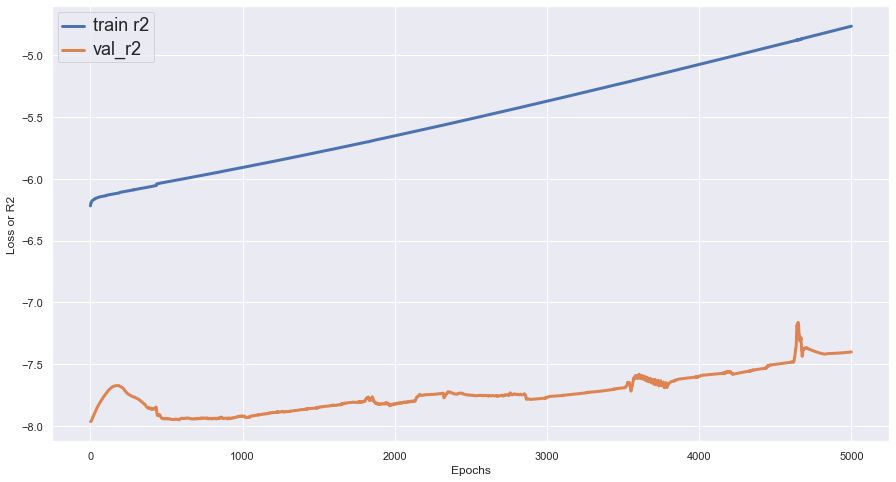

In [310]:

# plot the performance
epoch_num = range(1,epochs+1)
loss = H.history['loss']
r2 = H.history['coeff_determination']
val_loss = H.history['val_loss']
val_r2 = H.history['val_coeff_determination']
plot_df = pd.DataFrame(data=np.c_[epoch_num,loss,r2,val_loss,val_r2], 
                       columns=['epochs','loss', 'r2', 'val_loss', 'val_r2'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
#sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='r2', ax=ax, label='train r2', linewidth=3)
#sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_r2', ax=ax, label='val_r2', linewidth=3)
ax.set_ylabel('Loss or R2')
ax.set_xlabel('Epochs')

plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

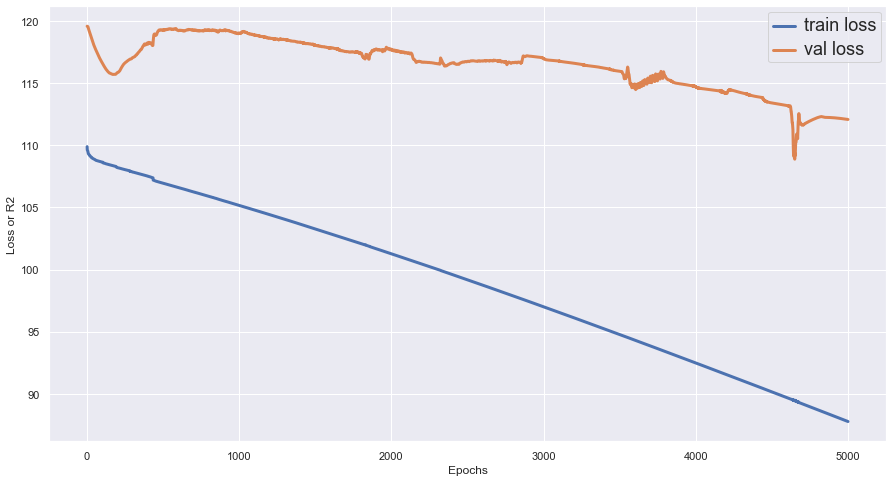

In [311]:
# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
ax.set_ylabel('Loss or R2')
ax.set_xlabel('Epochs')

plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [81]:
# import scoring and utility functions from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold, RepeatedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, make_scorer, r2_score
#
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [82]:
rs = RepeatedKFold(n_splits=5, n_repeats=10)
regressor = DecisionTreeRegressor()

In [83]:
param_grid = {
    'criterion' : ['mse', ',mae'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2,12,2)),
    'min_samples_split': list(range(2,12,2))
}    

In [84]:
grid = GridSearchCV(estimator=regressor, 
                    param_grid=param_grid, 
                    scoring=make_scorer(r2_score), 
                    cv=rs, 
                    return_train_score=True,
                   n_jobs=-1)

In [85]:
grid.fit(trainx, trainy)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', ',mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring=make_scorer(r2_score))

In [86]:
grid.best_score_

-0.23850163689638407